# Prelim test of the piecewise model
* ## [Setup](#setup)
* ## [Synthetic spectra](#synth)
    + ### [Generate synthetic observation - Antoine](#obs)
        + #### [Test the generated data](#testobs)
        + #### [Make a solution dictionary](#dict)
        + #### [Plot results for a sample](#sampplot) 
    + ### [Testing the synthetic data from Marc-Antoine](#masynth)
    + ### [Comparison with SPONGE-21 data](#sponge)
* ## [Functions](#func)

<a id='setup'></a>
## Setup

In [10]:
import numpy as np
import scipy
from astropy.io import fits
import astropy.table as pytabs
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
from scipy import optimize 
from scipy.stats import pearsonr as pcc
import copy
from ipywidgets import *
from IPython.display import display

os.chdir('SPARK/SPARK/synthetic/')
from synthetic import synth
os.chdir('../../../')

<a id='synth'></a>
## Synthetic spectra

<a id='obs'></a>
### Generate observation

In [11]:
# Open data                                                                                                                                                                                                                                                               
path = 'SPARK/data/'

hdu_list_rho = fits.open(path + 'rho_cube_sample.fits')
hdu_list_T = fits.open(path + 'T_cube_sample.fits')
hdu_list_vz = fits.open(path + 'vz_cube_sample.fits')

#Velocity range and channel spacing                                                                                                                                                                                                                                       
vmin = -40 #km.s-1                                                                                                                                                                                                                                                        
vmax = 40 #km.s-1                                                                                                                                                                                                                                                         
dv = 0.2 #km.s-1                                                                                                                                                                                                                                                        

rho_cube = hdu_list_rho[0].data #g.cm-3                                                                                                                                                                                                                                   
T_cube = hdu_list_T[0].data #K                                                                                                                                                                                                                                            
vz_cube = hdu_list_vz[0].data #cm.s-1           

dz=40/1024 #pc                                                                                                                                                                                                                           

core = synth(rho=rho_cube, T=T_cube, vz=vz_cube)
cube, tau = core.gen(vmin=vmin, vmax=vmax, dv=dv, thin=False)
cube_thin, tau_thin = core.gen(vmin=vmin, vmax=vmax, dv=dv, thin=True)

cube_WNM, tau_WNM = core.gen(vmin=vmin, vmax=vmax, dv=dv, T_lim=[5000,np.inf], thin=True)
cube_LNM, tau_LNM = core.gen(vmin=vmin, vmax=vmax, dv=dv, T_lim=[500,5000], thin=True)
cube_CNM, tau_CNM = core.gen(vmin=vmin, vmax=vmax, dv=dv, T_lim=[0,500], thin=True)

100%|██████████| 401/401 [00:21<00:00, 18.40it/s]
/data/francesbw/SPARK_validation/SPARK/SPARK/synthetic/synthetic.py:70: RuntimeWarning: invalid value encountered in true_divide
  n_Delta = n / Delta
  0%|          | 0/401 [00:00<?, ?it/s]/data/francesbw/SPARK_validation/SPARK/SPARK/synthetic/synthetic.py:85: RuntimeWarning: divide by zero encountered in true_divide
  phi = 1. / np.sqrt(2.*np.pi) / Delta * np.exp(- (u[i] - (vz_cube_phase))**2 / (2.*Delta2))
/data/francesbw/SPARK_validation/SPARK/SPARK/synthetic/synthetic.py:85: RuntimeWarning: invalid value encountered in multiply
  phi = 1. / np.sqrt(2.*np.pi) / Delta * np.exp(- (u[i] - (vz_cube_phase))**2 / (2.*Delta2))
100%|██████████| 401/401 [00:27<00:00, 14.49it/s]


<a id='testobs'></a>
#### Test the generated data

Picking a random pixel and getting the data array

In [30]:
x,y = [int(np.random.random(1)*32),int(np.random.random(1)*32)]
print('The selected pixels are x={}, y={}'.format(str(x+1), str(y+1)))

The selected pixels are x=10, y=12


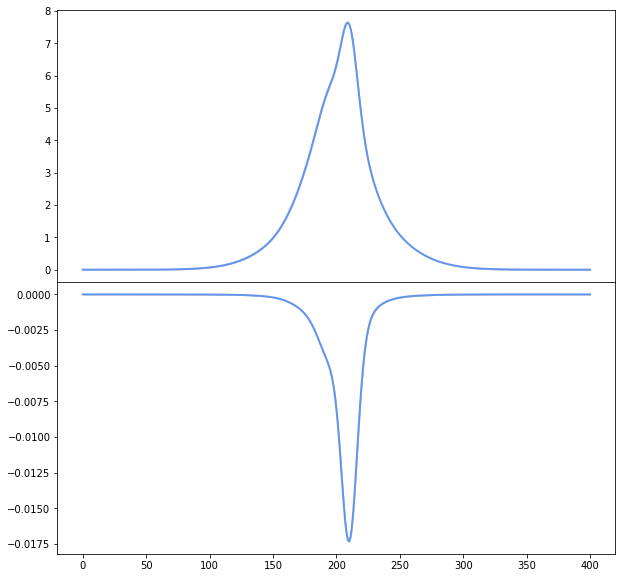

In [31]:
plot_data(cube[:,y,x], tau[:,y,x])

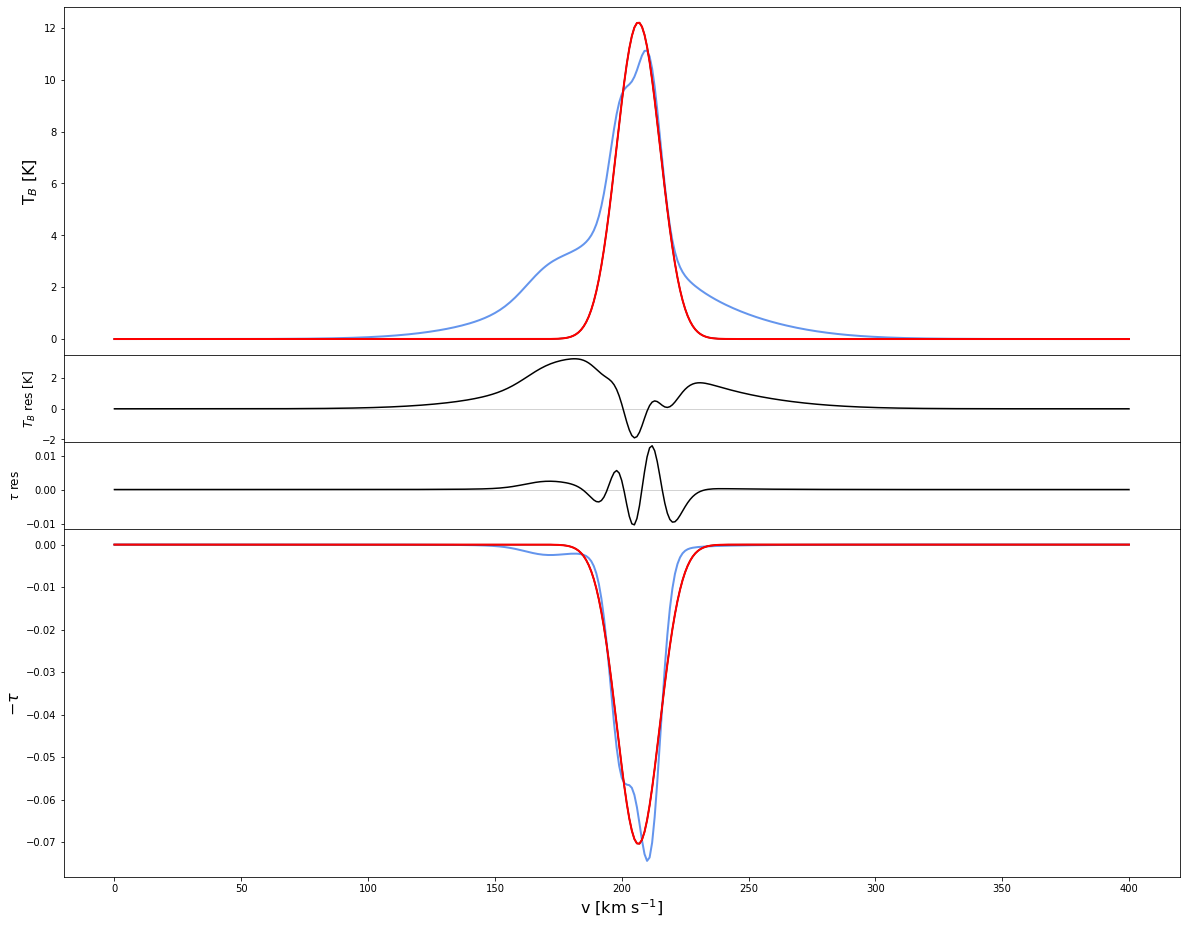

Gaussian 2 initialised as:
[[4.36944475e-01 0.00000000e+00 0.00000000e+00]
 [1.28622669e-02 2.12000000e+02 7.54106130e+00]]
Preferenced lambdas: 4.485379967384183e-05, 8.0


/data/francesbw/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/data/francesbw/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


********************
Fitted parameters
[[2.10570143e+02 0.00000000e+00 0.00000000e+00 7.78237904e+00
  0.00000000e+00 0.00000000e+00]
 [5.92063658e-02 2.05108106e+02 8.64897311e+00 2.83559171e-02
  2.11733974e+02 2.89543687e+00]]
********************


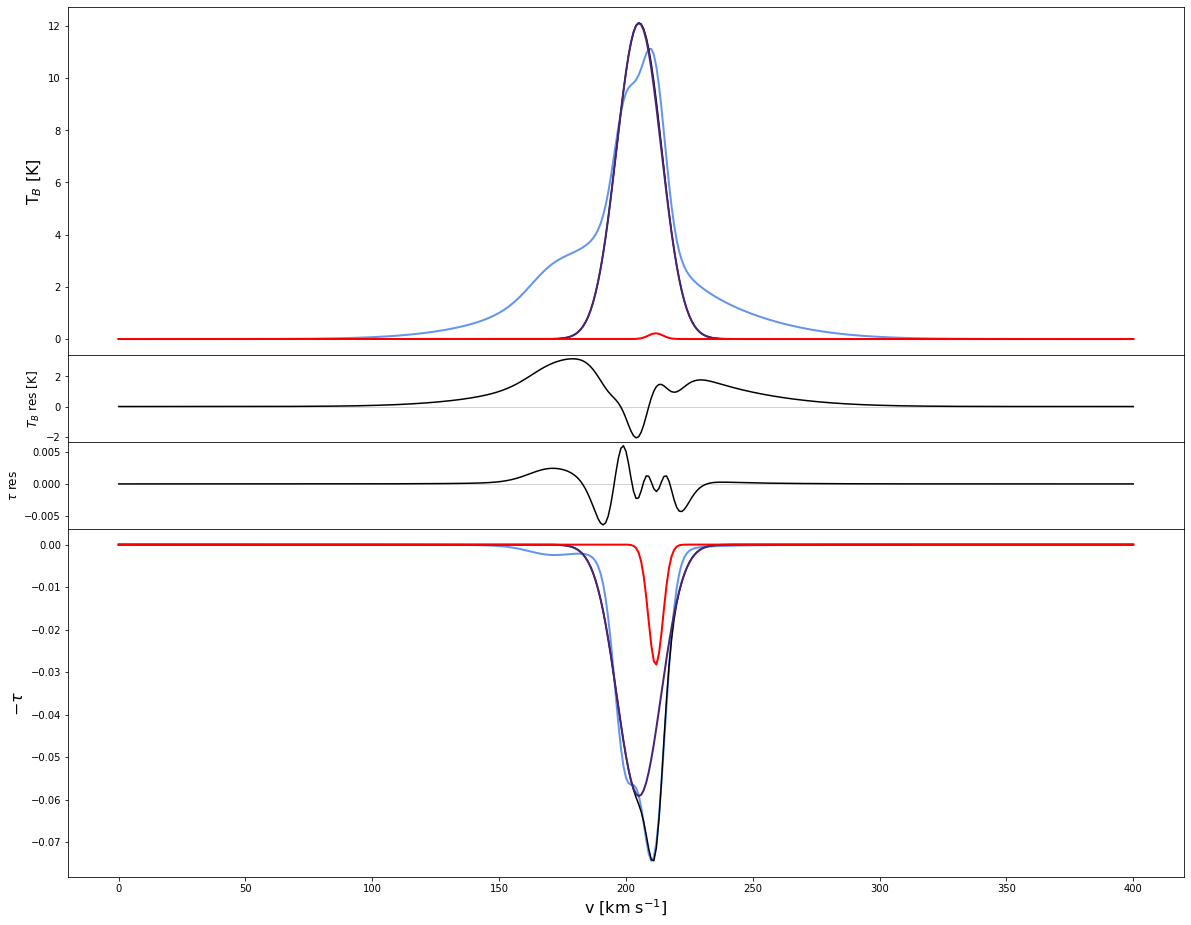

Gaussian 3 initialised as:
[[3.77556045e-01 0.00000000e+00 0.00000000e+00]
 [5.93351890e-03 1.99000000e+02 1.15718417e+01]]
Preferenced lambdas: 4.485379967384183e-05, 8.0
Threshold reached at 3
********************
Fitted parameters
[[4.03058475e+02 0.00000000e+00 0.00000000e+00 1.39177241e+02
  0.00000000e+00 0.00000000e+00 3.20577867e+00 1.79000000e+02
  1.37307530e+01]
 [8.60814666e-03 1.94784545e+02 2.95522860e+01 6.26072803e-02
  2.06881054e+02 7.56757848e+00 0.00000000e+00 1.78972979e+02
  1.37292239e+01]]
********************


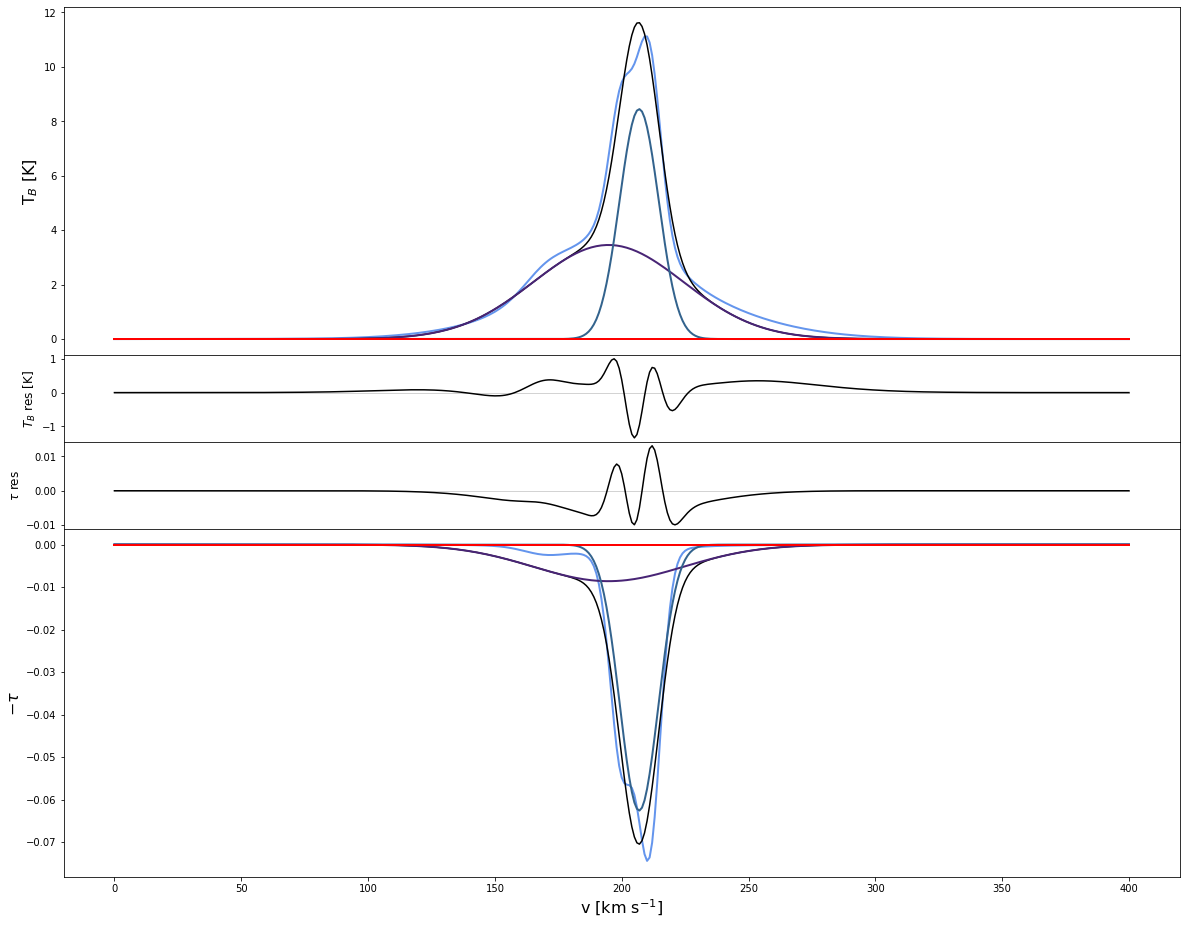

Gaussian 4 initialised as:
[[7.46128540e-01 2.12000000e+02 1.56170206e+01]
 [1.30805608e-02 2.12000000e+02 1.56170206e+01]]
Unpreferenced lambdas: 4.485379967384183e-05, 1.0
********************
Fitted parameters
[[4.18808381e+02 0.00000000e+00 0.00000000e+00 1.11449336e+02
  0.00000000e+00 0.00000000e+00 3.20577915e+00 1.79000000e+02
  1.37307530e+01 3.42389140e+00 1.96565419e+02 3.03491277e+01]
 [8.66807295e-04 1.81219514e+02 2.36199274e+01 7.19139078e-02
  2.06779703e+02 7.91795807e+00 1.23805959e-03 1.78972977e+02
  1.37292277e+01 0.00000000e+00 2.11986675e+02 1.54732705e+01]]
********************


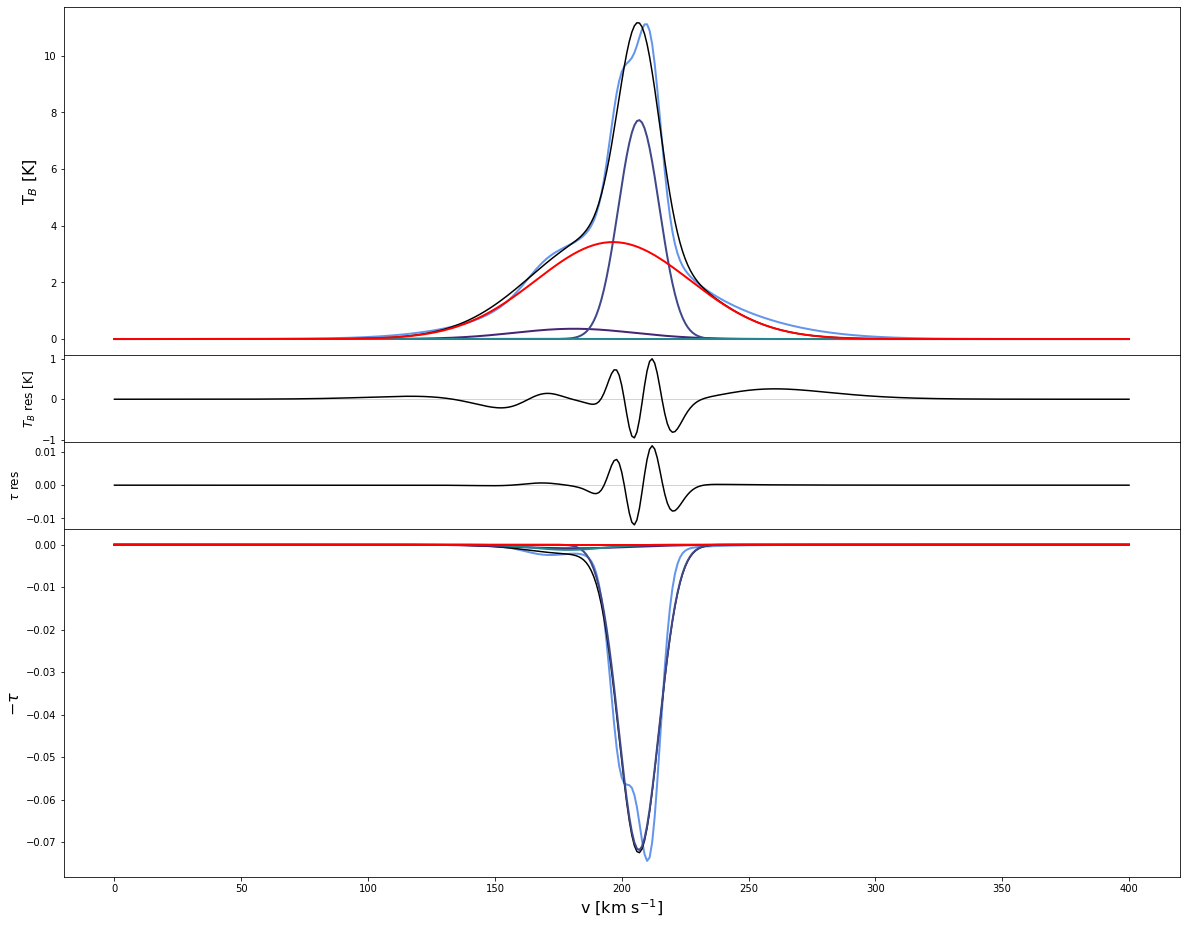

Gaussian 5 initialised as:
[[9.95340327e-01 2.12000000e+02 9.03451480e+00]
 [1.18440933e-02 2.12000000e+02 9.03451480e+00]]
Unpreferenced lambdas: 4.485379967384183e-05, 1.0
********************
Fitted parameters
[[4.18817871e+02 0.00000000e+00 0.00000000e+00 1.11828282e+02
  0.00000000e+00 0.00000000e+00 3.23249355e+00 1.79000000e+02
  1.37307530e+01 2.82765532e+00 2.00573010e+02 3.24368035e+01
  4.68013832e+00 2.12142797e+02 5.35047065e+00]
 [2.46795741e-03 1.81871818e+02 2.00663790e+01 5.42829172e-02
  2.02709761e+02 6.35384603e+00 0.00000000e+00 1.78840017e+02
  1.37548295e+01 1.93618219e-03 2.11980113e+02 1.54461913e+01
  5.03677413e-02 2.12182134e+02 3.58715533e+00]]
********************


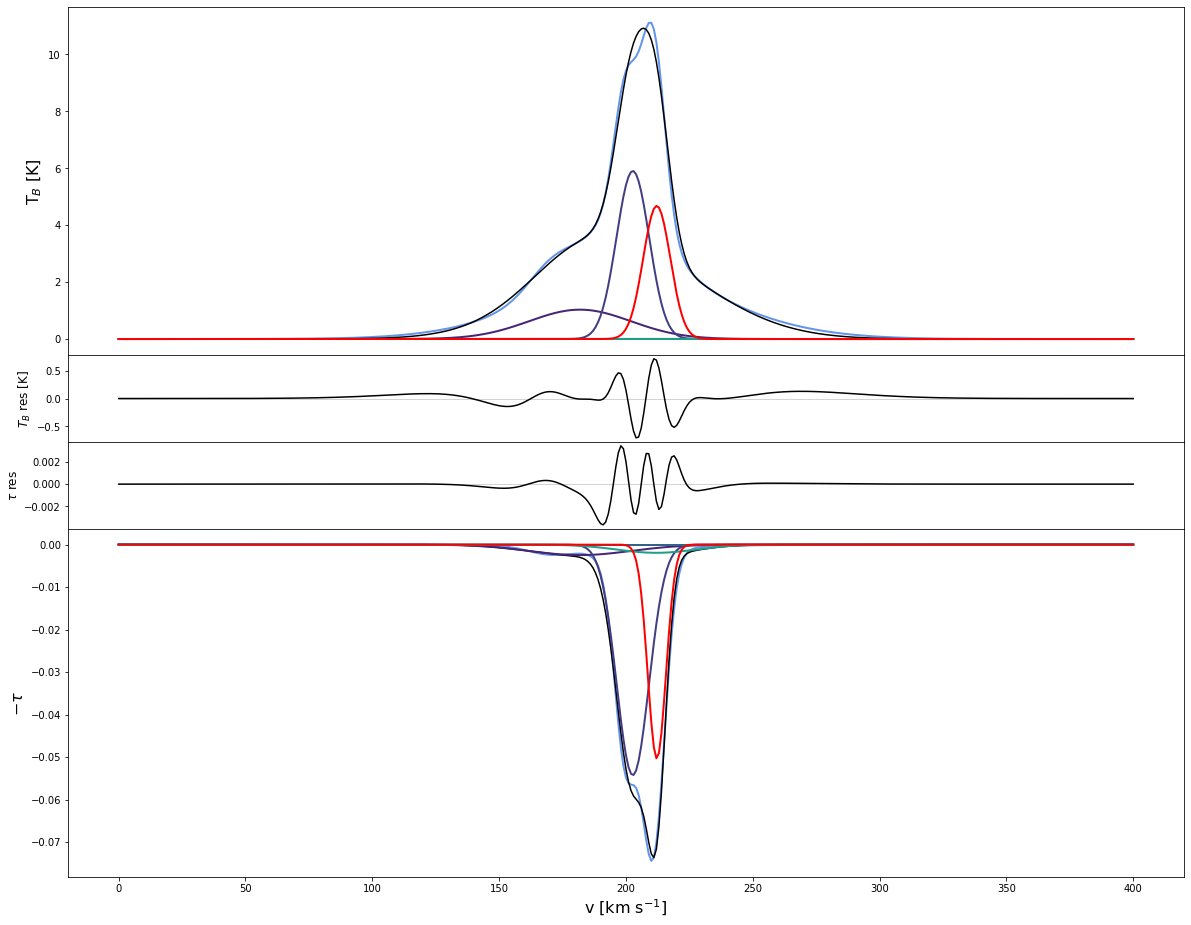

Gaussian 6 initialised as:
[[7.12435485e-01 2.11000000e+02 6.59394089e+00]
 [2.36174726e-05 2.11000000e+02 6.59394089e+00]]
Unpreferenced lambdas: 4.485379967384183e-05, 1.0
********************
Fitted parameters
[[4.18820872e+02 0.00000000e+00 0.00000000e+00 1.11863430e+02
  0.00000000e+00 0.00000000e+00 3.23249355e+00 1.79000000e+02
  1.37307530e+01 3.04791794e+00 2.00544608e+02 3.24794281e+01
  5.33425413e+00 2.11897272e+02 4.03431347e+00 1.07813196e+00
  2.11003917e+02 6.55142154e+00]
 [2.08761884e-03 1.81906528e+02 1.99601736e+01 5.22444084e-02
  2.01511744e+02 5.63024392e+00 0.00000000e+00 1.78840017e+02
  1.37548295e+01 8.53143061e-04 2.11998678e+02 1.54346690e+01
  5.75048363e-02 2.11753972e+02 3.97812094e+00 2.74663809e-03
  2.11117286e+02 6.69393750e+00]]
********************


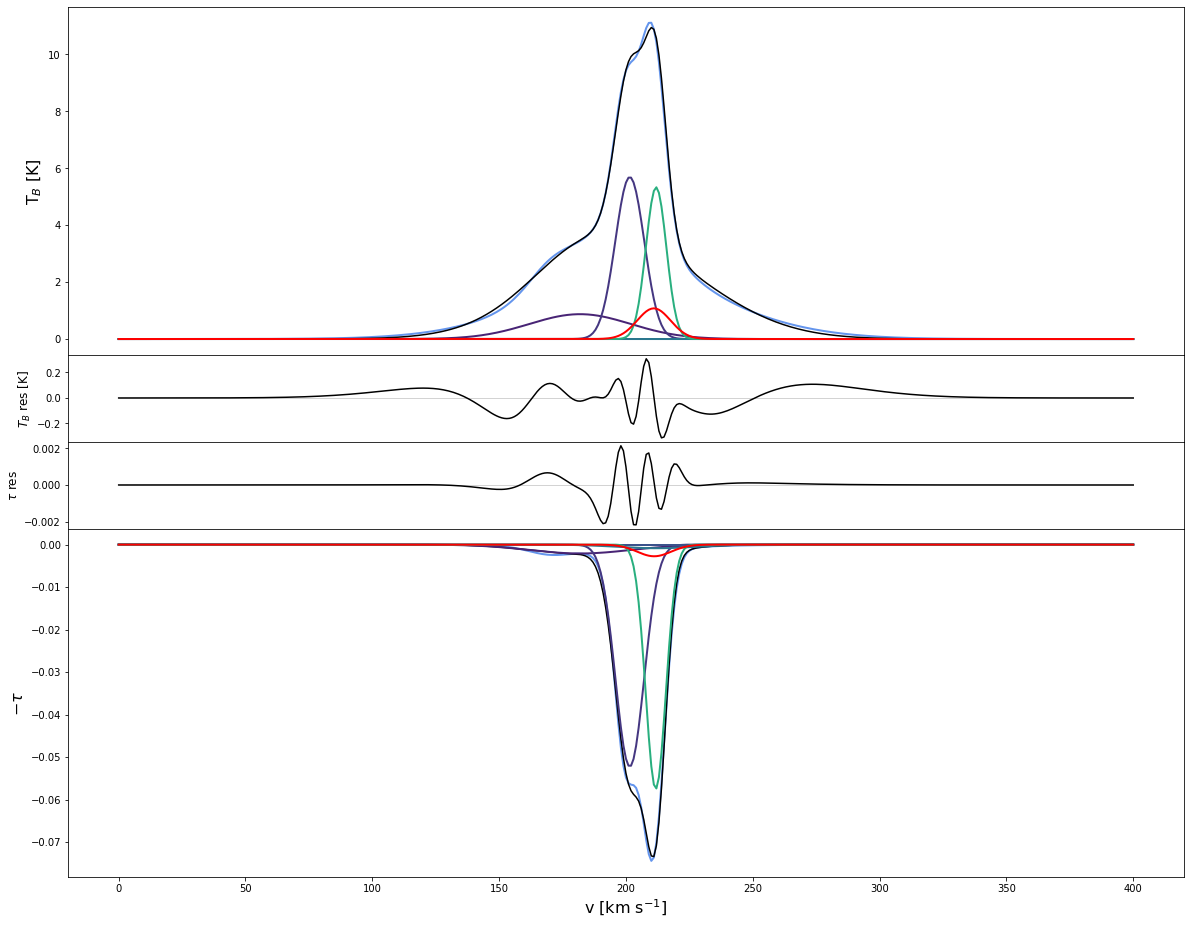

Gaussian 7 initialised as:
[[1.29550227e-01 1.98000000e+02 1.96925262e+01]
 [2.13614474e-03 1.98000000e+02 1.96925262e+01]]
Unpreferenced lambdas: 4.485379967384183e-05, 1.0
********************
Fitted parameters
[[4.18821430e+02 0.00000000e+00 0.00000000e+00 1.11866735e+02
  0.00000000e+00 0.00000000e+00 3.23250405e+00 1.79000000e+02
  1.37307530e+01 2.86891014e+00 2.00581452e+02 3.26230967e+01
  5.54603024e+00 2.11245557e+02 4.20131612e+00 1.27344642e+00
  2.10997179e+02 6.51080477e+00 2.98401274e-01 1.97994181e+02
  1.96853855e+01]
 [2.02865896e-03 1.81911472e+02 1.98894246e+01 4.89501867e-02
  2.00832927e+02 5.24344323e+00 1.95624915e-04 1.78839678e+02
  1.37548354e+01 0.00000000e+00 2.12007005e+02 1.54303222e+01
  5.14261268e-02 2.11314394e+02 3.80376383e+00 1.48439264e-02
  2.11167911e+02 6.72889505e+00 0.00000000e+00 1.98000262e+02
  1.96904247e+01]]
********************


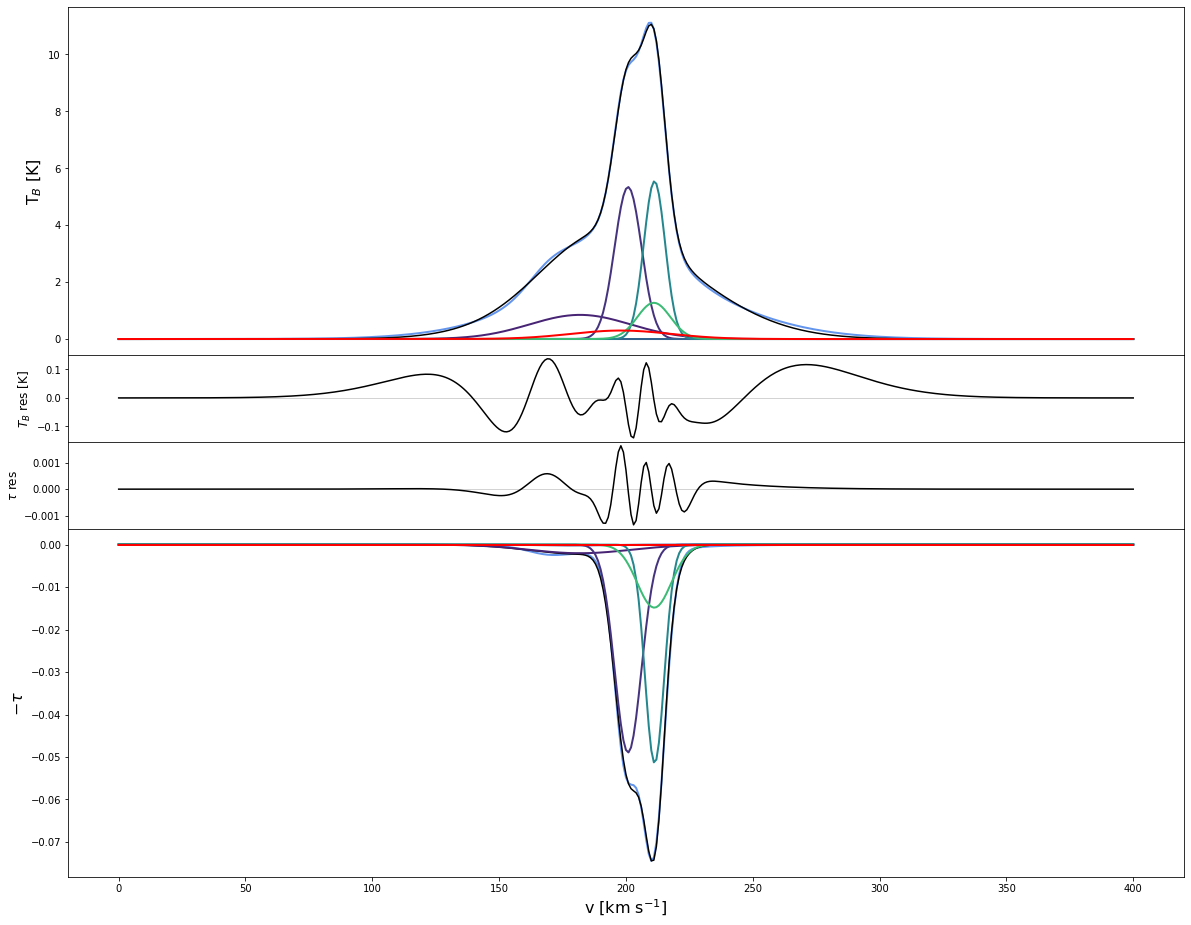

Gaussian 8 initialised as:
[[5.65923798e-02 1.98000000e+02 2.63014219e+01]
 [1.62818199e-03 1.98000000e+02 2.63014219e+01]]
Unpreferenced lambdas: 4.485379967384183e-05, 1.0
********************
Fitted parameters
[[4.18821621e+02 0.00000000e+00 0.00000000e+00 1.11859356e+02
  0.00000000e+00 0.00000000e+00 3.23252913e+00 1.79000000e+02
  1.37307530e+01 2.81620083e+00 2.00625548e+02 3.27863115e+01
  5.72658771e+00 2.11059274e+02 4.19327594e+00 1.37595007e+00
  2.11002608e+02 6.44823666e+00 1.88030236e-01 1.97987103e+02
  1.96786365e+01 1.95761885e-02 1.97999577e+02 2.63011167e+01]
 [2.28733921e-03 1.81907813e+02 1.98408665e+01 4.92711478e-02
  2.00584112e+02 5.05601029e+00 0.00000000e+00 1.78838897e+02
  1.37546807e+01 8.94674334e-05 2.12007318e+02 1.54302734e+01
  5.81450418e-02 2.11196973e+02 4.12157213e+00 8.94043440e-03
  2.11159750e+02 6.68479193e+00 0.00000000e+00 1.98000262e+02
  1.96904247e+01 0.00000000e+00 1.98000005e+02 2.63010508e+01]]
********************


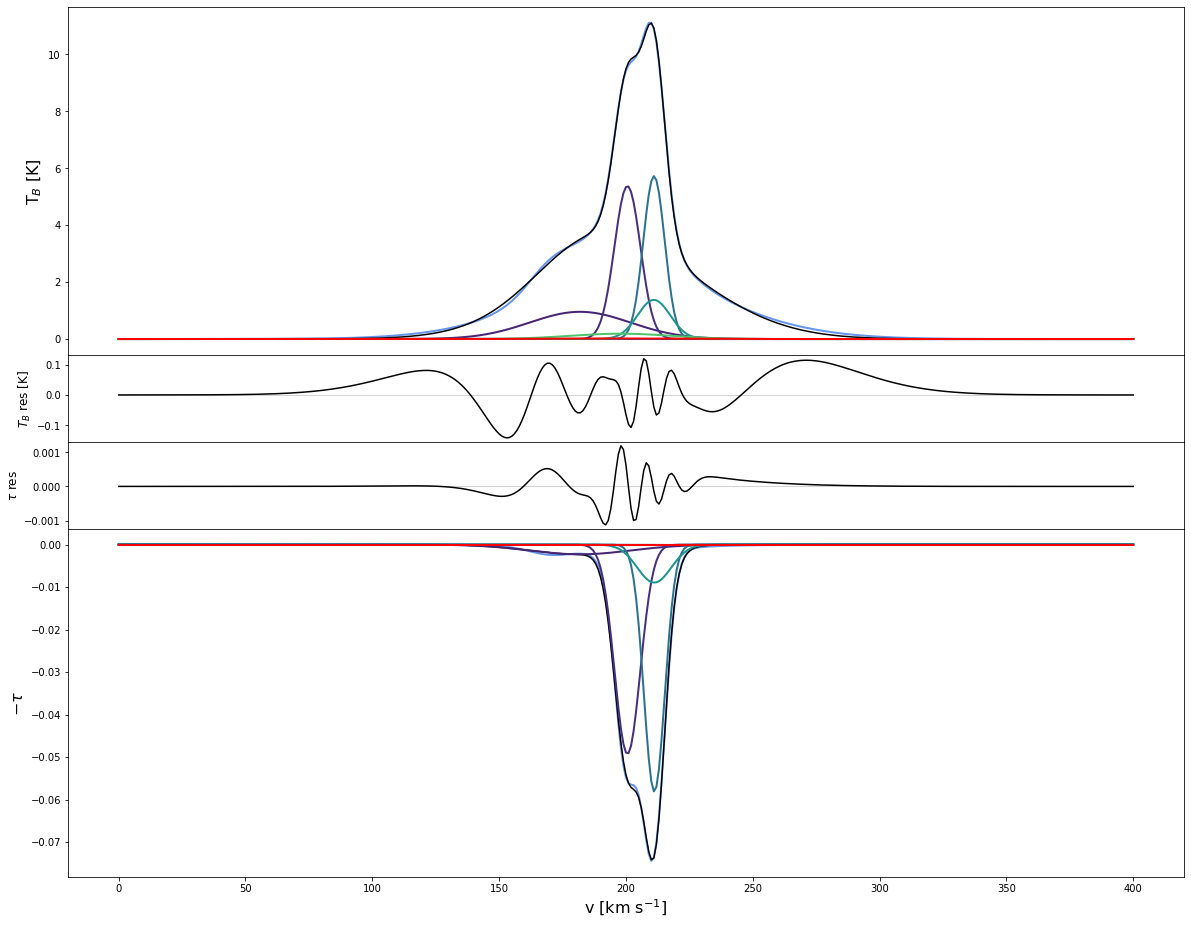

In [48]:
solution=iterative(np.array([cube[:,y,x], tau[:,y,x]]), 8, init_tau_pref=8)

<a id='dict'></a>
#### Making a solution dictionary

In [12]:
solution_map = {}

The initial log magnitudes of each component are:
[ 3. -3.]
The adjusted magnitudes are:
[6.00769823e-07 1.00000000e+04]


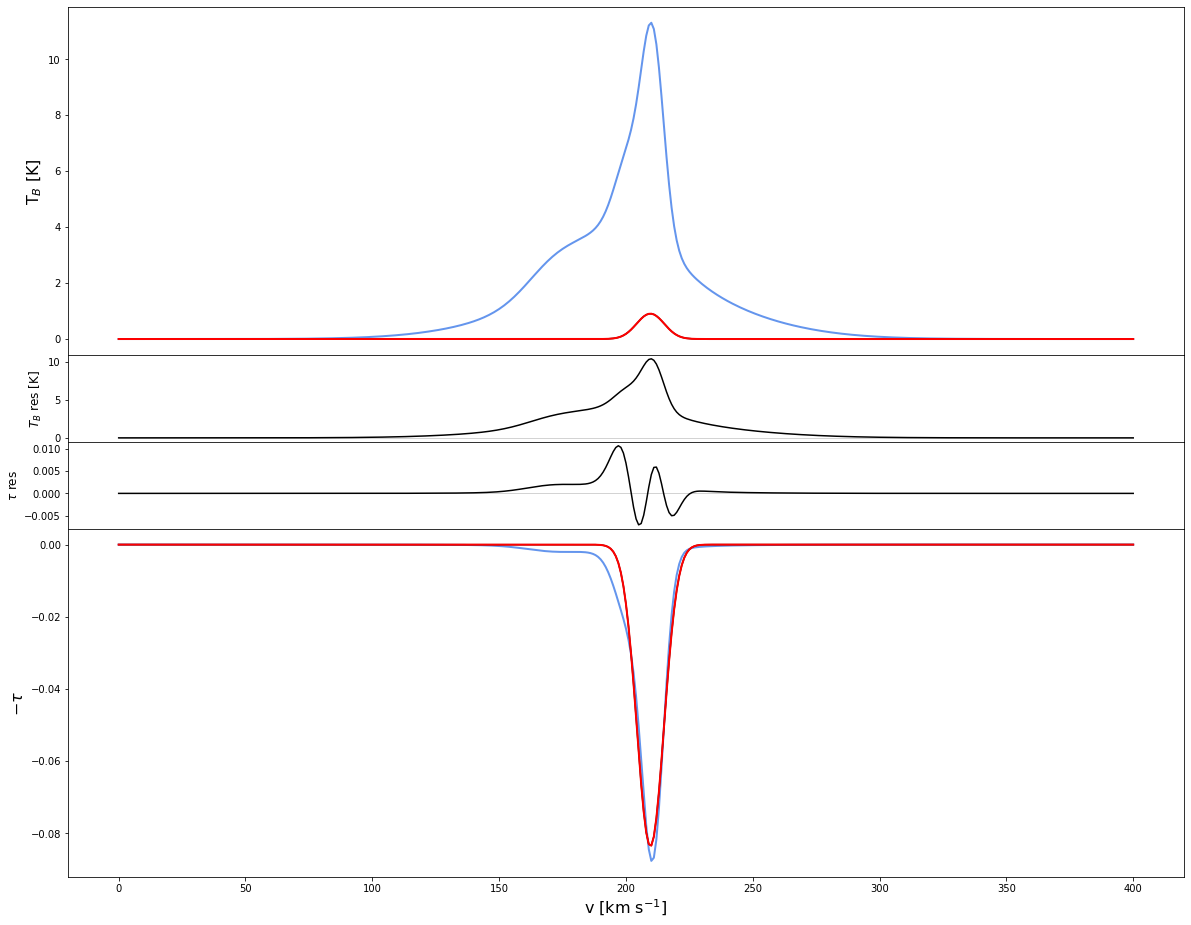

Gaussian 2 initialised as:
[[5.87693021e+00 0.00000000e+00 0.00000000e+00]
 [1.07368949e-02 1.97000000e+02 8.47796056e+00]]
Preferenced lambdas: 6.007698234552057e-07, 80000.0
********************
Fitted parameters
[[1.13051190e+01 0.00000000e+00 0.00000000e+00 5.87695300e+00
  0.00000000e+00 0.00000000e+00]
 [6.87171865e-02 2.10711004e+02 4.03694128e+00 2.50334377e-02
  2.04733045e+02 7.91657475e+00]]
********************


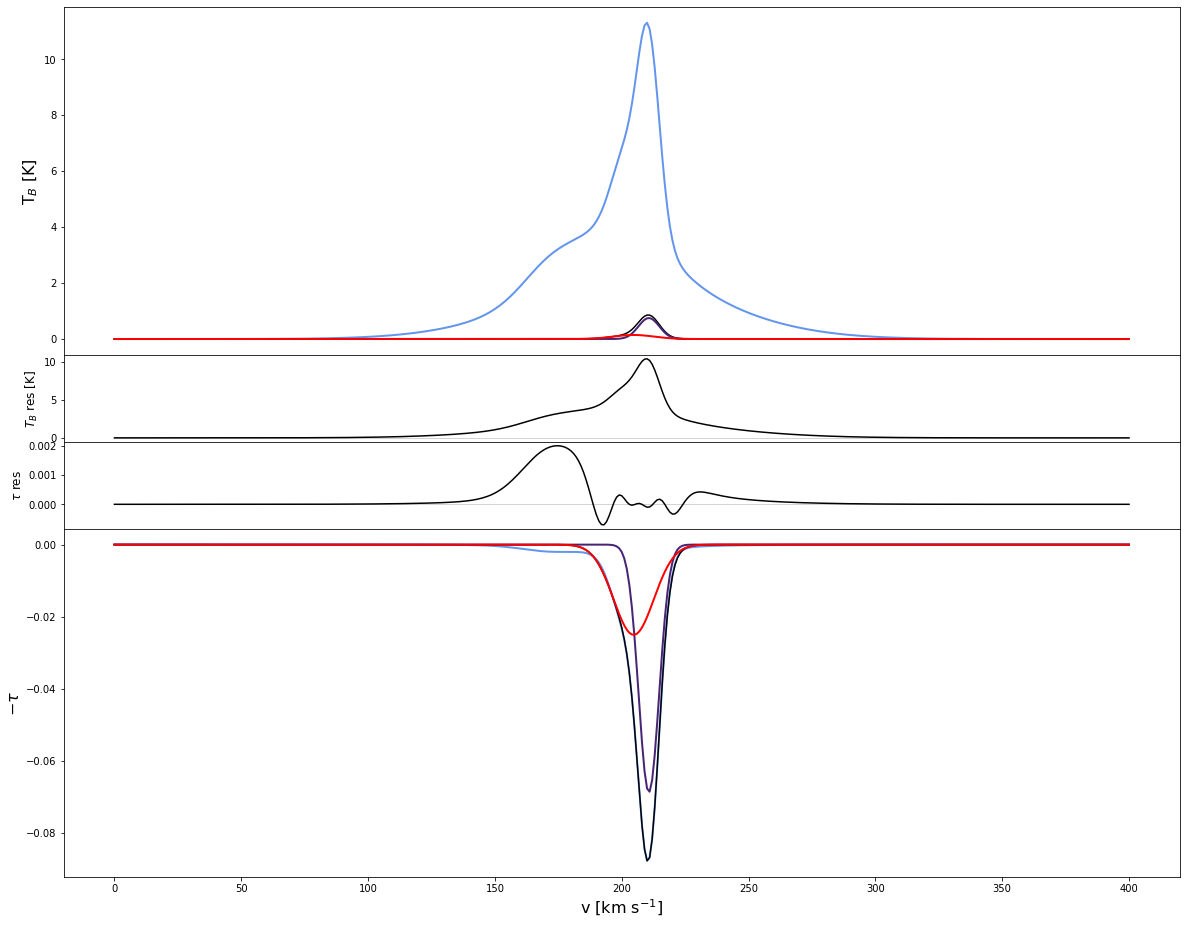

Gaussian 3 initialised as:
[[3.22035163e+00 0.00000000e+00 0.00000000e+00]
 [2.00694985e-03 1.75000000e+02 8.10626152e+00]]
Preferenced lambdas: 6.007698234552057e-07, 80000.0
********************
Fitted parameters
[[1.13052517e+01 0.00000000e+00 0.00000000e+00 5.87703906e+00
  0.00000000e+00 0.00000000e+00 3.22035517e+00 0.00000000e+00
  0.00000000e+00]
 [6.68526481e-02 2.10781064e+02 3.98148377e+00 2.69751981e-02
  2.05211821e+02 7.59313875e+00 2.06510953e-03 1.72981563e+02
  1.19053817e+01]]
********************


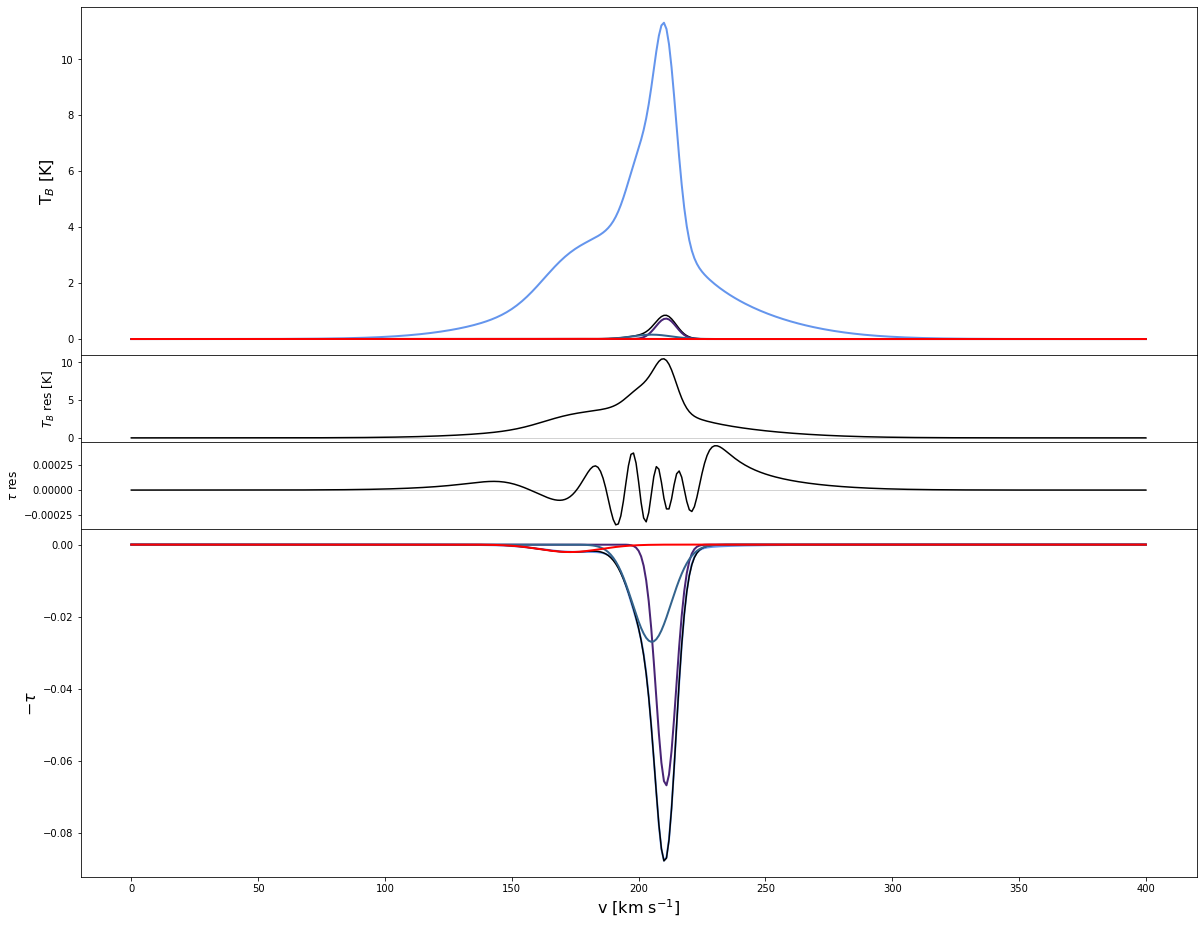

Gaussian 4 initialised as:
[[1.96563385e+00 0.00000000e+00 0.00000000e+00]
 [4.42987957e-04 2.30000000e+02 1.41980411e+01]]
Preferenced lambdas: 6.007698234552057e-07, 80000.0
********************
Fitted parameters
[[1.13052698e+01 0.00000000e+00 0.00000000e+00 5.87705112e+00
  0.00000000e+00 0.00000000e+00 3.22035576e+00 0.00000000e+00
  0.00000000e+00 1.96563397e+00 0.00000000e+00 0.00000000e+00]
 [6.88876988e-02 2.10793927e+02 4.03199103e+00 2.57091664e-02
  2.04693886e+02 7.40186637e+00 2.07070147e-03 1.73052230e+02
  1.19534666e+01 4.41957329e-04 2.30009920e+02 1.42028431e+01]]
********************


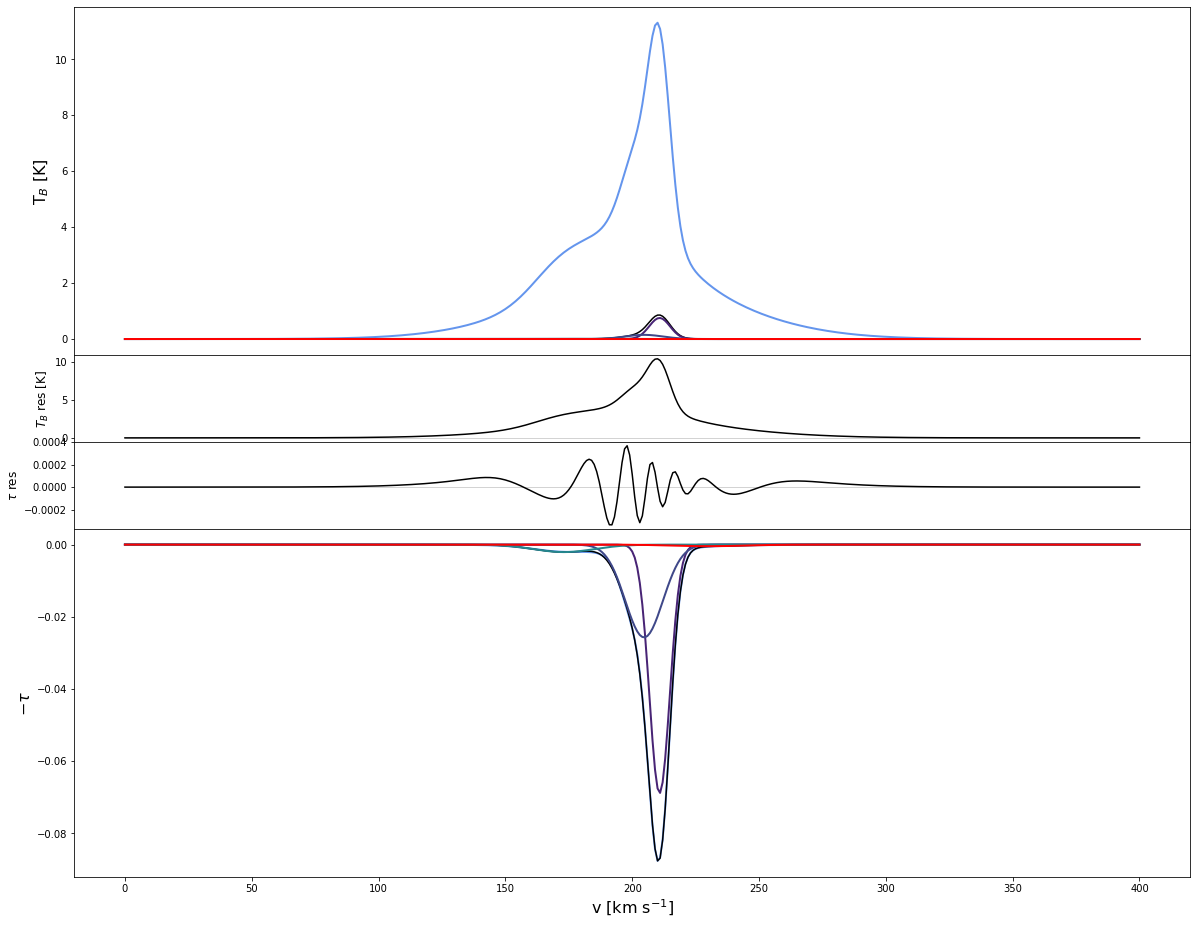

Gaussian 5 initialised as:
[[6.12874677e+00 0.00000000e+00 0.00000000e+00]
 [3.68083664e-04 1.98000000e+02 9.71953876e+00]]
Preferenced lambdas: 6.007698234552057e-07, 80000.0
********************
Fitted parameters
[[1.13052698e+01 0.00000000e+00 0.00000000e+00 5.87705112e+00
  0.00000000e+00 0.00000000e+00 3.22035576e+00 0.00000000e+00
  0.00000000e+00 1.96563397e+00 0.00000000e+00 0.00000000e+00
  6.12874677e+00 0.00000000e+00 0.00000000e+00]
 [6.88898617e-02 2.10793887e+02 4.03207619e+00 2.57038835e-02
  2.04693871e+02 7.40189900e+00 2.07012625e-03 1.73052232e+02
  1.19534685e+01 4.41862018e-04 2.30009920e+02 1.42028434e+01
  3.50368624e-06 1.98000000e+02 9.71953905e+00]]
********************


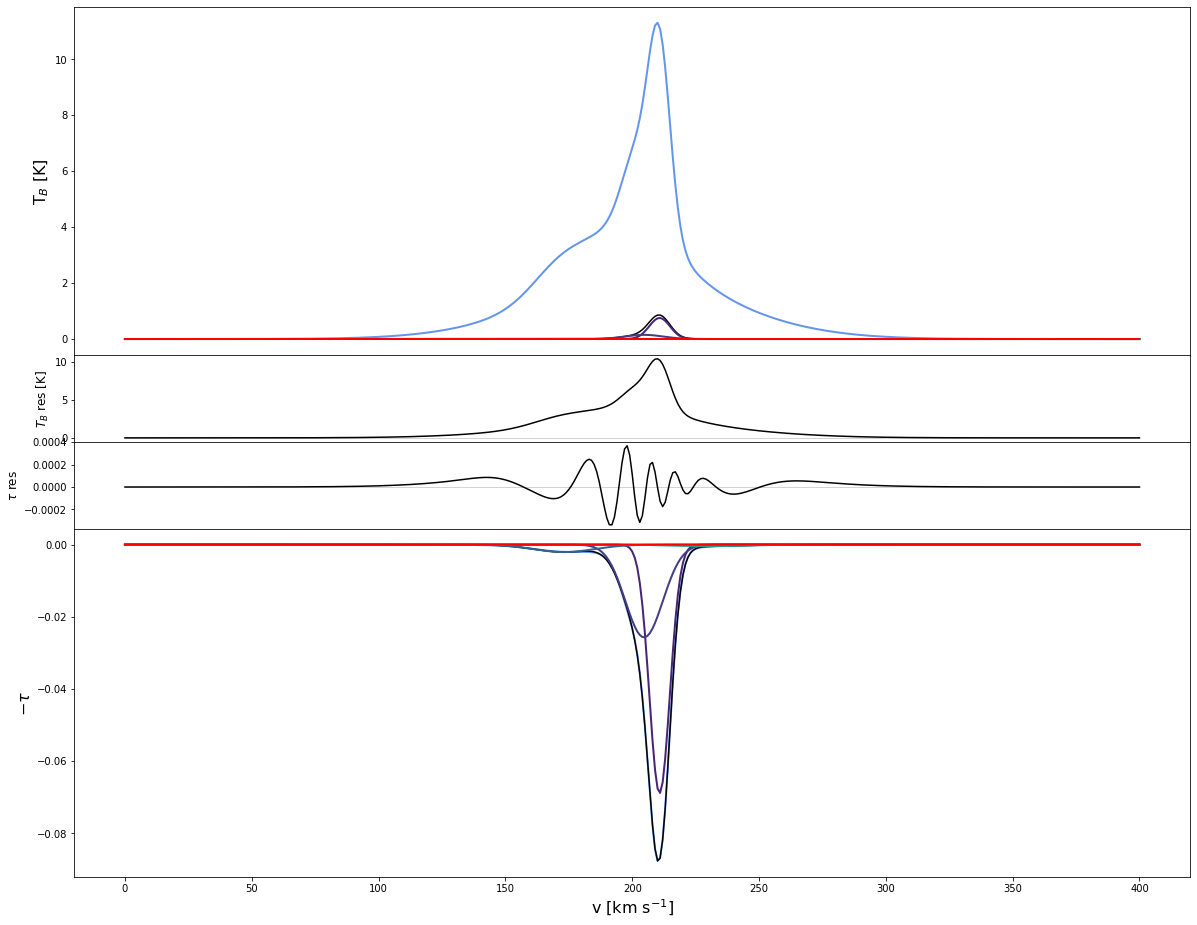

Gaussian 6 initialised as:
[[6.12874387e+00 0.00000000e+00 0.00000000e+00]
 [3.67946475e-04 1.98000000e+02 9.70744298e+00]]
Preferenced lambdas: 6.007698234552057e-07, 80000.0
Threshold reached at 6
********************
Fitted parameters
[[1.13052705e+01 0.00000000e+00 0.00000000e+00 5.87705158e+00
  0.00000000e+00 0.00000000e+00 3.22035579e+00 0.00000000e+00
  0.00000000e+00 1.96563397e+00 0.00000000e+00 0.00000000e+00
  6.12874677e+00 0.00000000e+00 0.00000000e+00 1.04503165e+01
  2.10000000e+02 1.14554417e+01]
 [6.88445817e-02 2.10790611e+02 4.02924765e+00 2.55903285e-02
  2.04693744e+02 7.40074006e+00 2.06660275e-03 1.73052459e+02
  1.19535827e+01 4.10327085e-04 2.30009917e+02 1.42028527e+01
  0.00000000e+00 1.98000000e+02 9.71953906e+00 1.51220788e-04
  2.10000001e+02 1.14554430e+01]]
********************


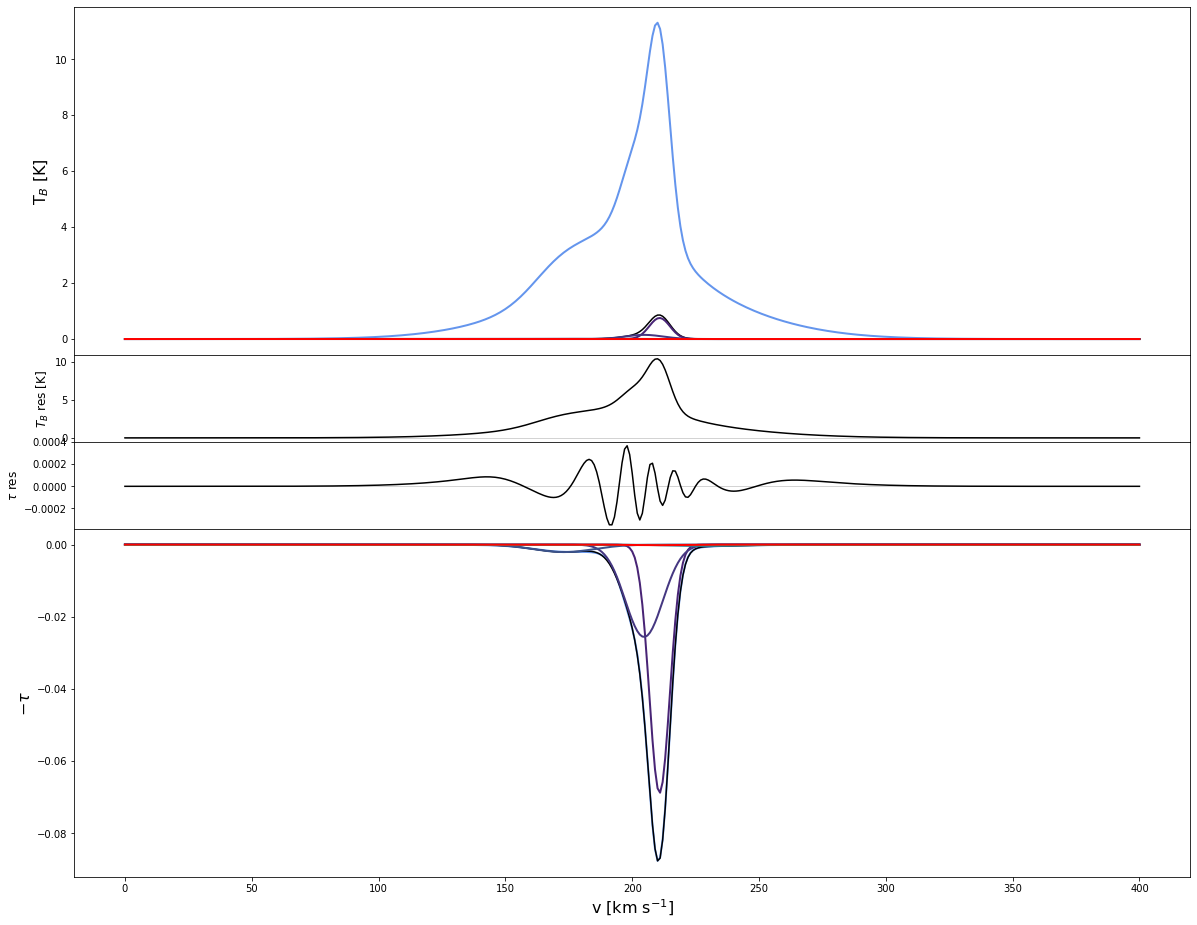

The initial log magnitudes of each component are:
[ 3. -3.]
The adjusted magnitudes are:
[5.23907322e-07 1.00000000e+04]


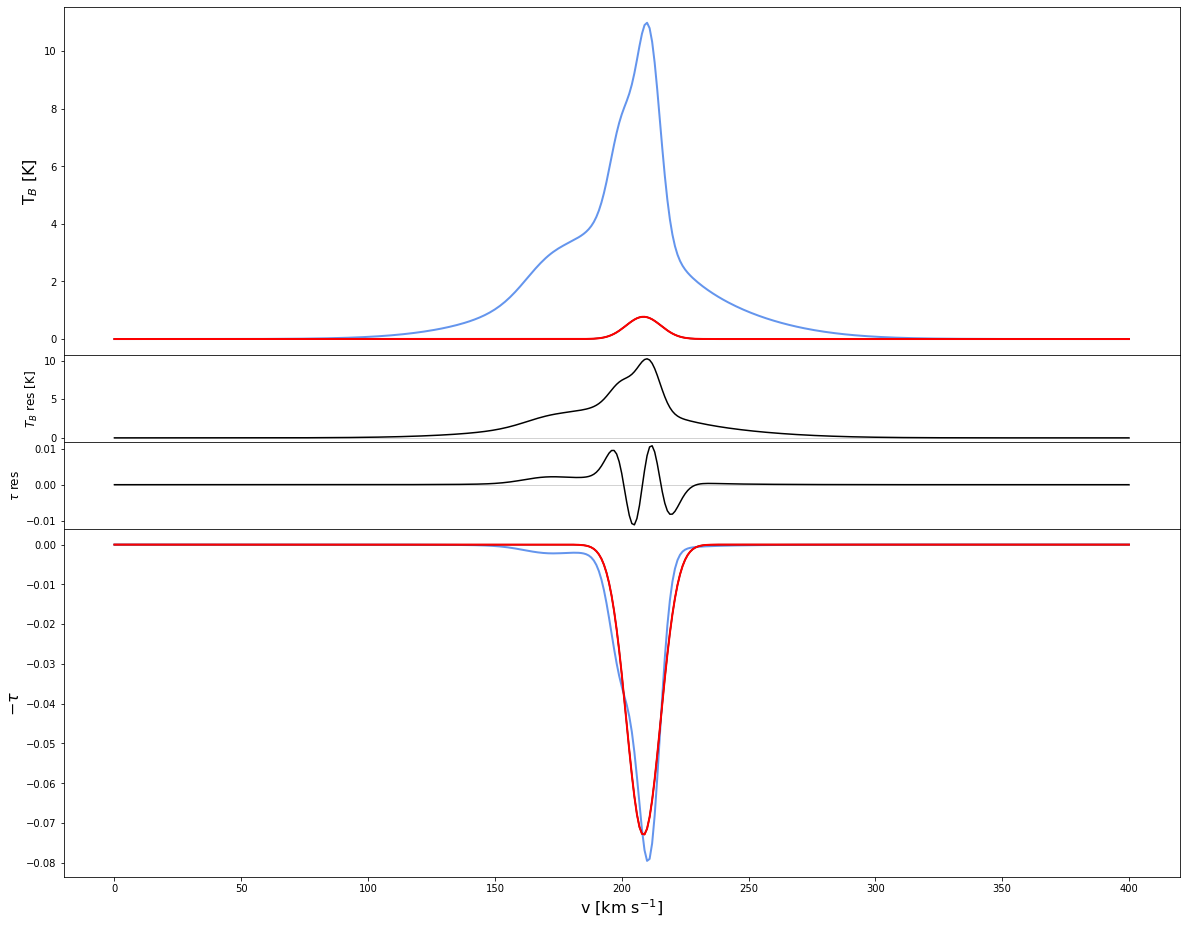

Gaussian 2 initialised as:
[[9.64293932e+00 0.00000000e+00 0.00000000e+00]
 [1.08458778e-02 2.12000000e+02 9.11191978e+00]]
Preferenced lambdas: 5.239073218932334e-07, 80000.0
Threshold reached at 2
********************
Fitted parameters
[[1.09869637e+01 0.00000000e+00 0.00000000e+00 1.02290307e+01
  2.10000000e+02 1.15689423e+01]
 [5.01239033e-02 2.11419819e+02 3.76101738e+00 4.14169252e-02
  2.04703759e+02 7.61294432e+00]]
********************


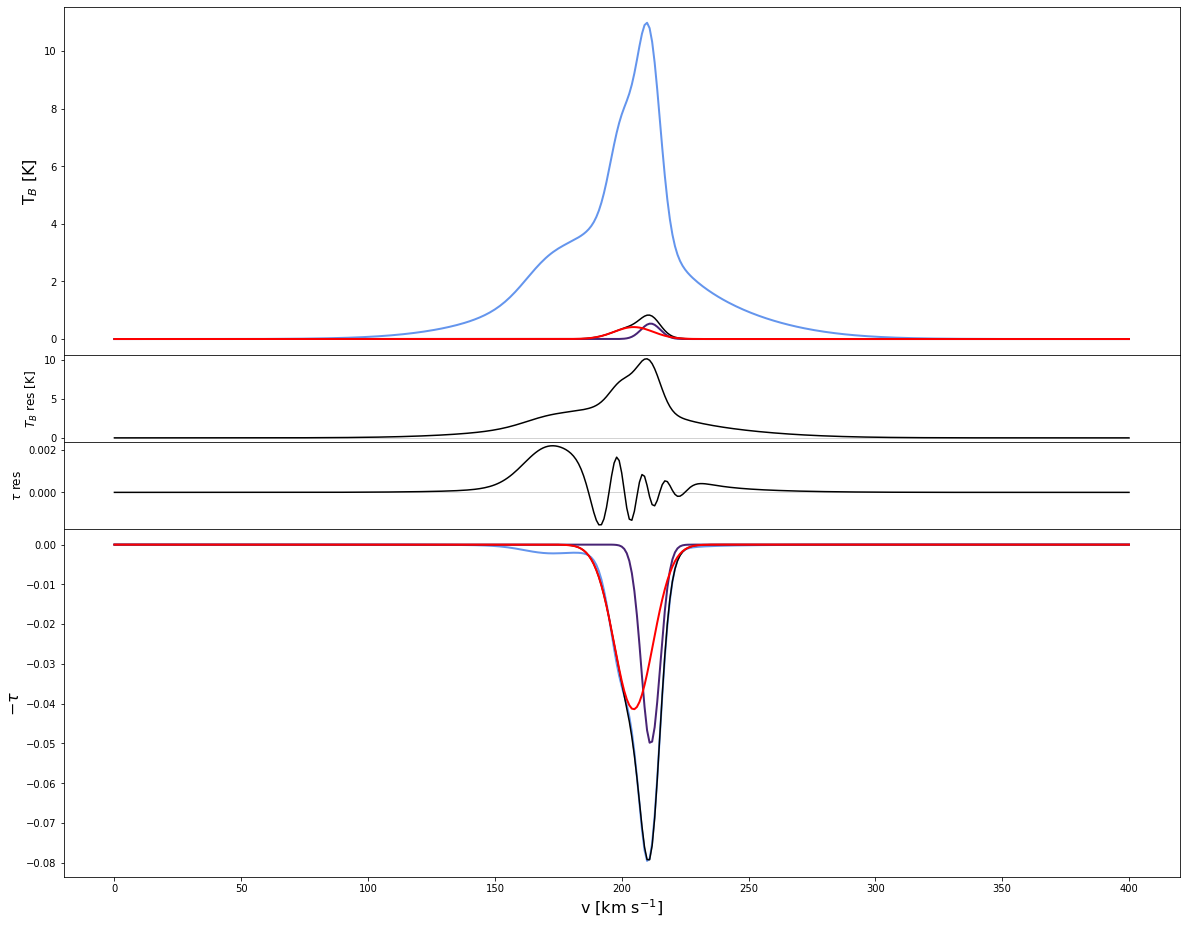

Gaussian 3 initialised as:
[[1.01581467e+01 2.10000000e+02 1.16021424e+01]
 [3.30039330e-04 2.10000000e+02 1.16021424e+01]]
Unpreferenced lambdas: 5.239073218932334e-07, 10000.0
********************
Fitted parameters
[[1.09862366e+01 0.00000000e+00 0.00000000e+00 1.02291679e+01
  2.10000000e+02 1.15689423e+01 1.01354652e+01 2.09967442e+02
  1.16101901e+01]
 [7.56360474e-02 2.10685955e+02 4.41762318e+00 2.94458660e-02
  2.00167156e+02 4.64319124e+00 2.43073786e-03 1.89367187e+02
  2.38977085e+01]]
********************


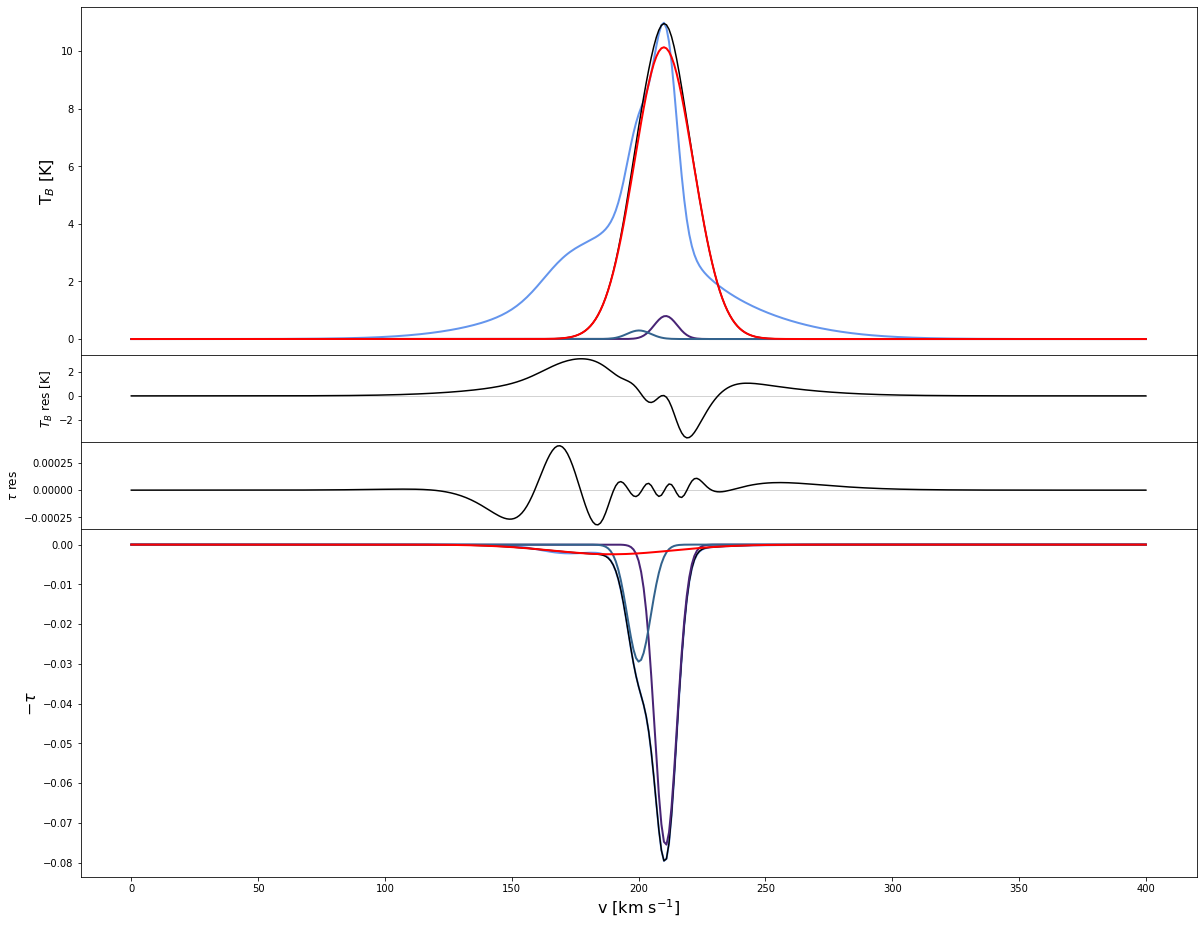

Gaussian 4 initialised as:
[[3.06688667e+00 1.77000000e+02 1.34170462e+01]
 [9.68750967e-06 1.77000000e+02 1.34170462e+01]]
Unpreferenced lambdas: 5.239073218932334e-07, 10000.0
********************
Fitted parameters
[[1.09862360e+01 0.00000000e+00 0.00000000e+00 1.02291678e+01
  2.10000000e+02 1.15689423e+01 1.01354428e+01 2.09967431e+02
  1.16101797e+01 3.06688902e+00 1.76999999e+02 1.34170466e+01]
 [7.58455452e-02 2.10691161e+02 4.43361469e+00 2.96763754e-02
  2.00147695e+02 4.67646833e+00 1.88068660e-03 1.89368821e+02
  2.38989522e+01 5.73722147e-04 1.76999324e+02 1.34168400e+01]]
********************


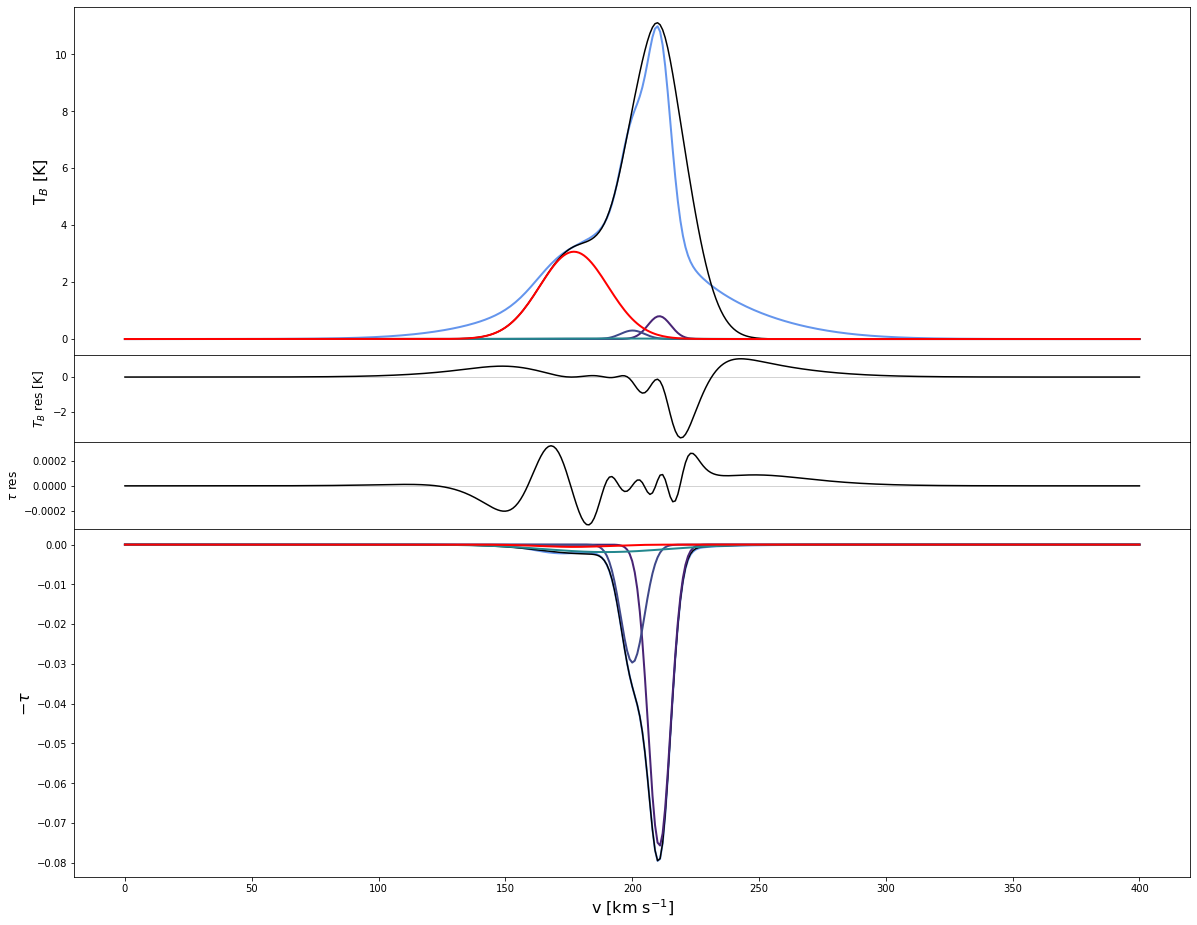

Gaussian 5 initialised as:
[[1.04957497e+00 2.43000000e+02 2.06708318e+01]
 [8.40932612e-05 2.43000000e+02 2.06708318e+01]]
Unpreferenced lambdas: 5.239073218932334e-07, 10000.0
********************
Fitted parameters
[[1.09862353e+01 0.00000000e+00 0.00000000e+00 1.02291677e+01
  2.10000000e+02 1.15689423e+01 1.01354158e+01 2.09967418e+02
  1.16101631e+01 3.06689062e+00 1.76999998e+02 1.34170465e+01
  1.04955209e+00 2.43000001e+02 2.06708305e+01]
 [7.59735008e-02 2.10693247e+02 4.43679293e+00 2.98754418e-02
  2.00135830e+02 4.69869530e+00 1.50357405e-03 1.89369371e+02
  2.38993729e+01 9.33229262e-04 1.76998233e+02 1.34168697e+01
  1.68110518e-04 2.42999879e+02 2.06708797e+01]]
********************


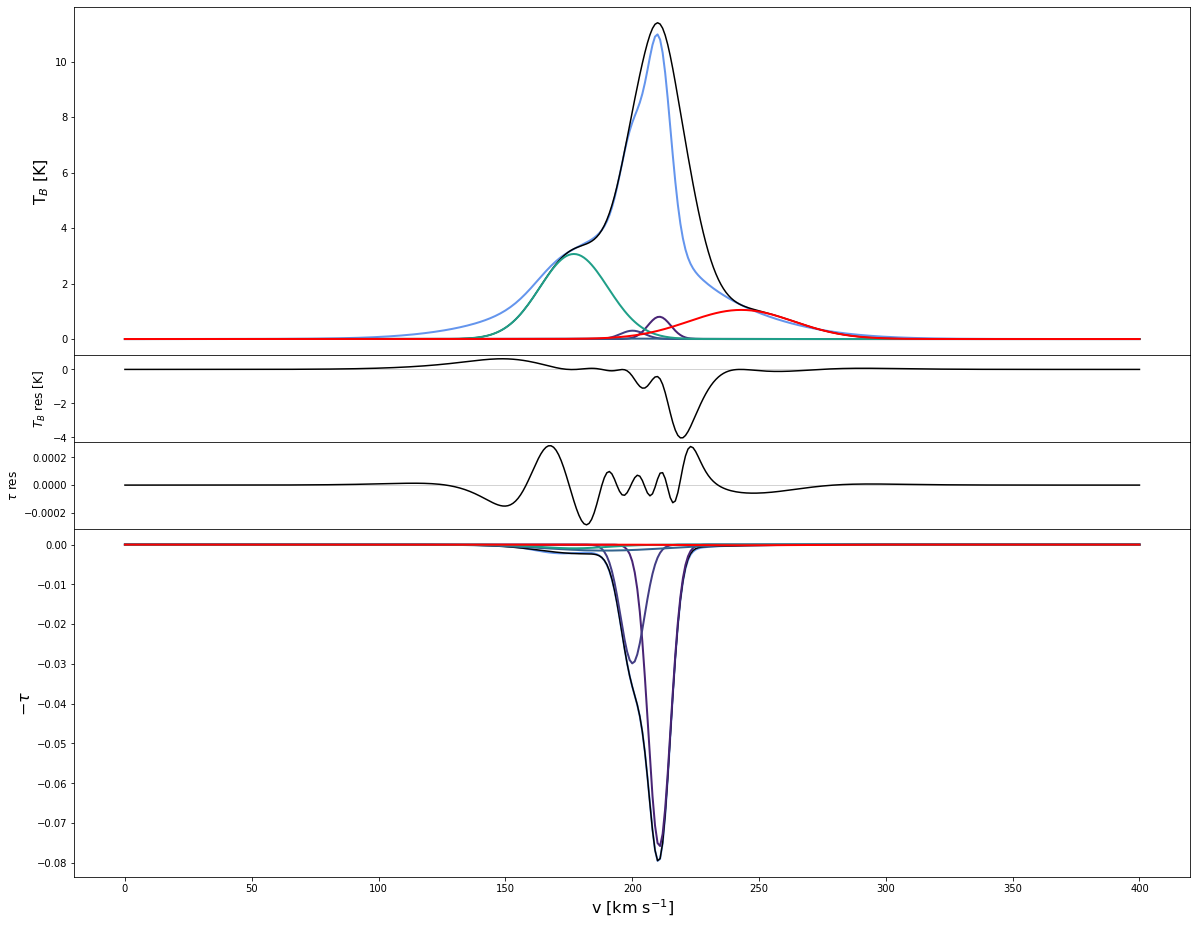

Gaussian 6 initialised as:
[[6.26139714e-01 1.49000000e+02 1.14006639e+01]
 [1.50450351e-04 1.49000000e+02 1.14006639e+01]]
Unpreferenced lambdas: 5.239073218932334e-07, 10000.0
********************
Fitted parameters
[[1.09862352e+01 0.00000000e+00 0.00000000e+00 1.02291677e+01
  2.10000000e+02 1.15689423e+01 1.01354131e+01 2.09967416e+02
  1.16101614e+01 3.06689053e+00 1.76999997e+02 1.34170464e+01
  1.04954983e+00 2.43000001e+02 2.06708304e+01 6.26139821e-01
  1.49000000e+02 1.14006639e+01]
 [7.59678999e-02 2.10693513e+02 4.43848145e+00 2.98749145e-02
  2.00136267e+02 4.69868056e+00 1.49246301e-03 1.89369448e+02
  2.38993918e+01 9.45039079e-04 1.76998120e+02 1.34168350e+01
  1.68196359e-04 2.42999863e+02 2.06708844e+01 0.00000000e+00
  1.49000006e+02 1.14006623e+01]]
********************


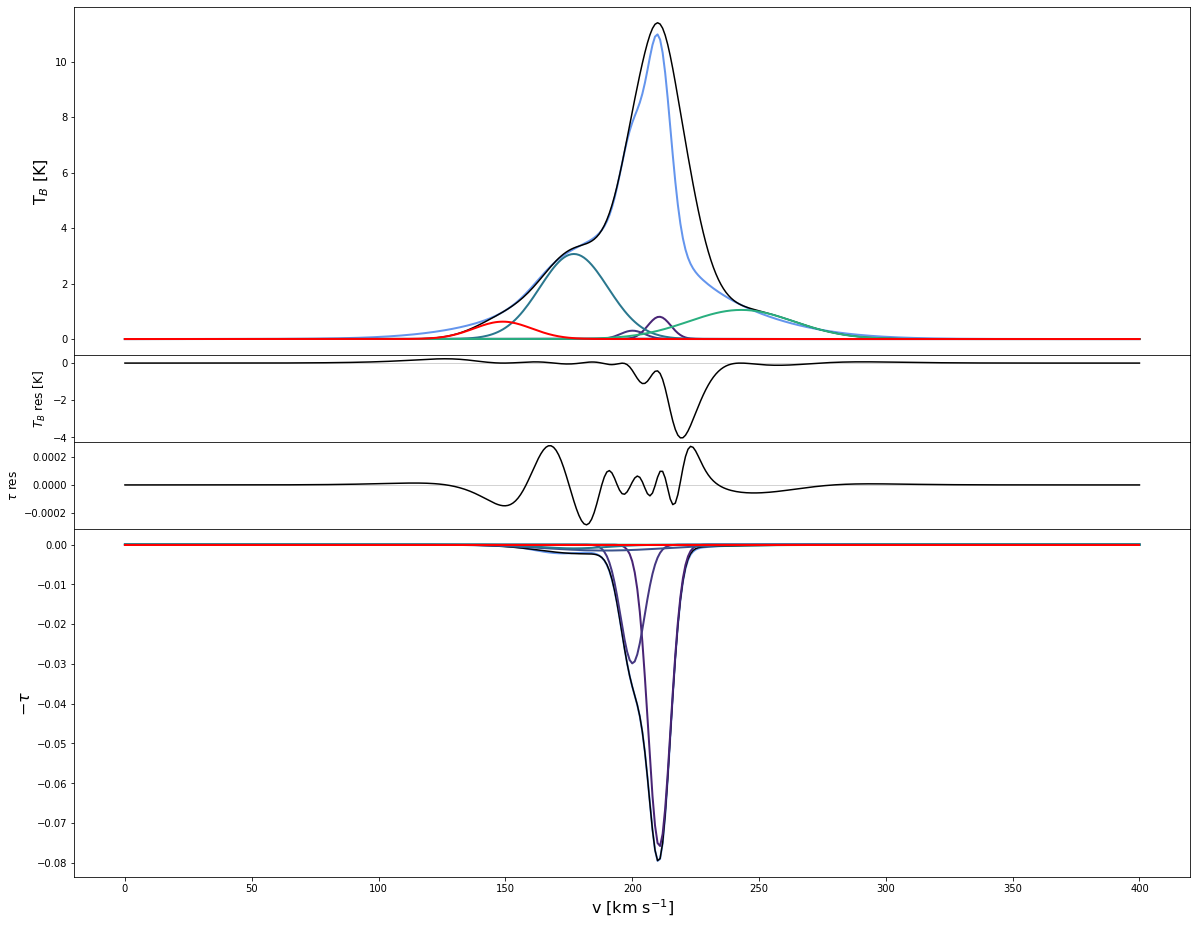

The initial log magnitudes of each component are:
[ 3. -3.]
The adjusted magnitudes are:
[6.10112099e-07 1.00000000e+04]


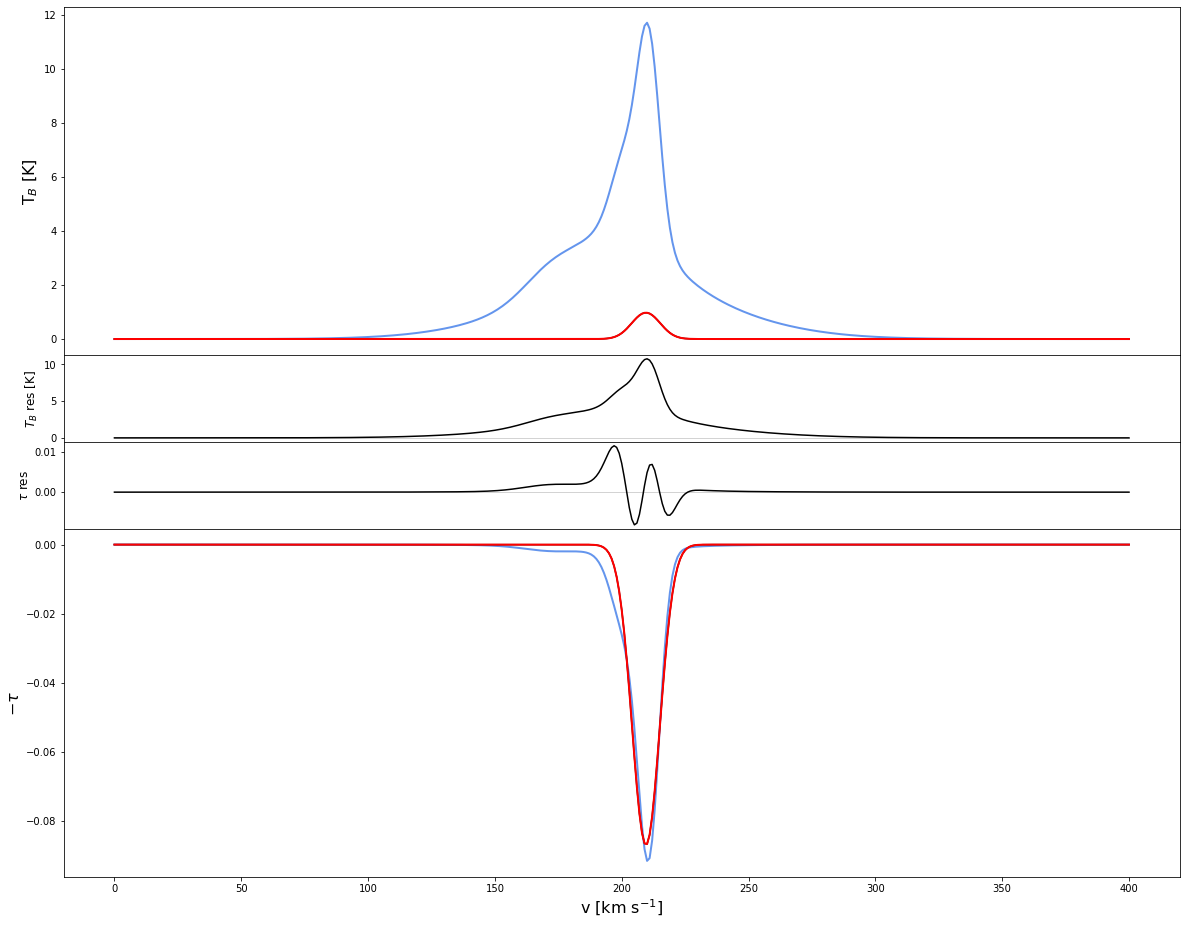

Gaussian 2 initialised as:
[[5.98774532e+00 0.00000000e+00 0.00000000e+00]
 [1.15341611e-02 1.97000000e+02 8.30947924e+00]]
Preferenced lambdas: 6.101120993690128e-07, 80000.0


/data/francesbw/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


********************
Fitted parameters
[[1.17211500e+01 0.00000000e+00 0.00000000e+00 5.98774871e+00
  0.00000000e+00 0.00000000e+00]
 [6.95214746e-02 2.10827765e+02 3.99698775e+00 2.93348039e-02
  2.04905953e+02 7.71154907e+00]]
********************


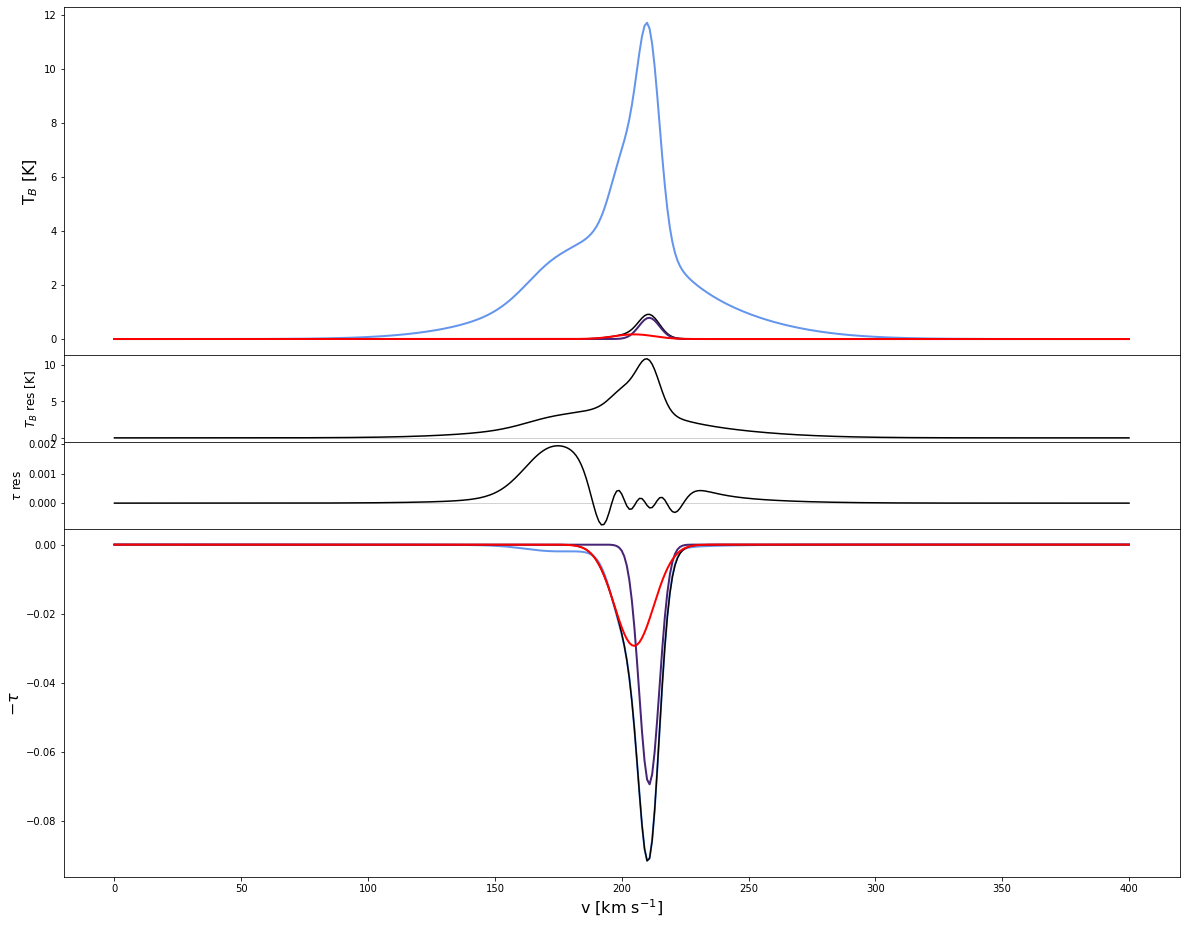

Gaussian 3 initialised as:
[[3.09699387e+00 0.00000000e+00 0.00000000e+00]
 [1.94450629e-03 1.75000000e+02 8.38790800e+00]]
Preferenced lambdas: 6.101120993690128e-07, 80000.0
********************
Fitted parameters
[[1.17212982e+01 0.00000000e+00 0.00000000e+00 5.98785756e+00
  0.00000000e+00 0.00000000e+00 3.09699737e+00 0.00000000e+00
  0.00000000e+00]
 [6.80498894e-02 2.10885712e+02 3.95480881e+00 3.09022811e-02
  2.05229804e+02 7.48532354e+00 2.00128881e-03 1.73016025e+02
  1.13508731e+01]]
********************


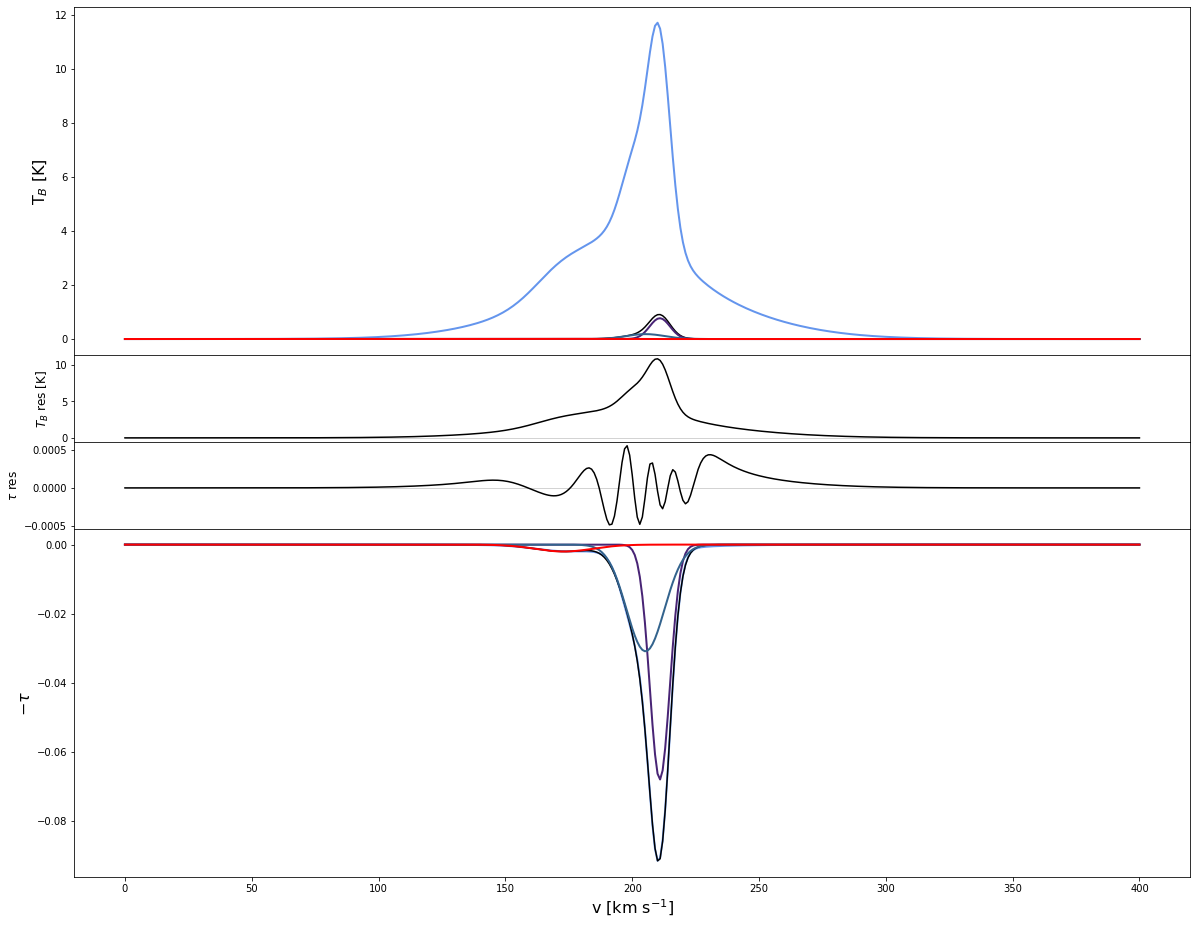

Gaussian 4 initialised as:
[[6.27360481e+00 0.00000000e+00 0.00000000e+00]
 [5.57835429e-04 1.98000000e+02 1.35964797e+01]]
Preferenced lambdas: 6.101120993690128e-07, 80000.0
********************
Fitted parameters
[[1.17213005e+01 0.00000000e+00 0.00000000e+00 5.98785929e+00
  0.00000000e+00 0.00000000e+00 3.09699743e+00 0.00000000e+00
  0.00000000e+00 6.27360481e+00 0.00000000e+00 0.00000000e+00]
 [6.80482254e-02 2.10888517e+02 3.95502121e+00 3.08501280e-02
  2.05236665e+02 7.46509175e+00 1.97782086e-03 1.73017811e+02
  1.13520893e+01 9.23470029e-05 1.98000063e+02 1.35966073e+01]]
********************


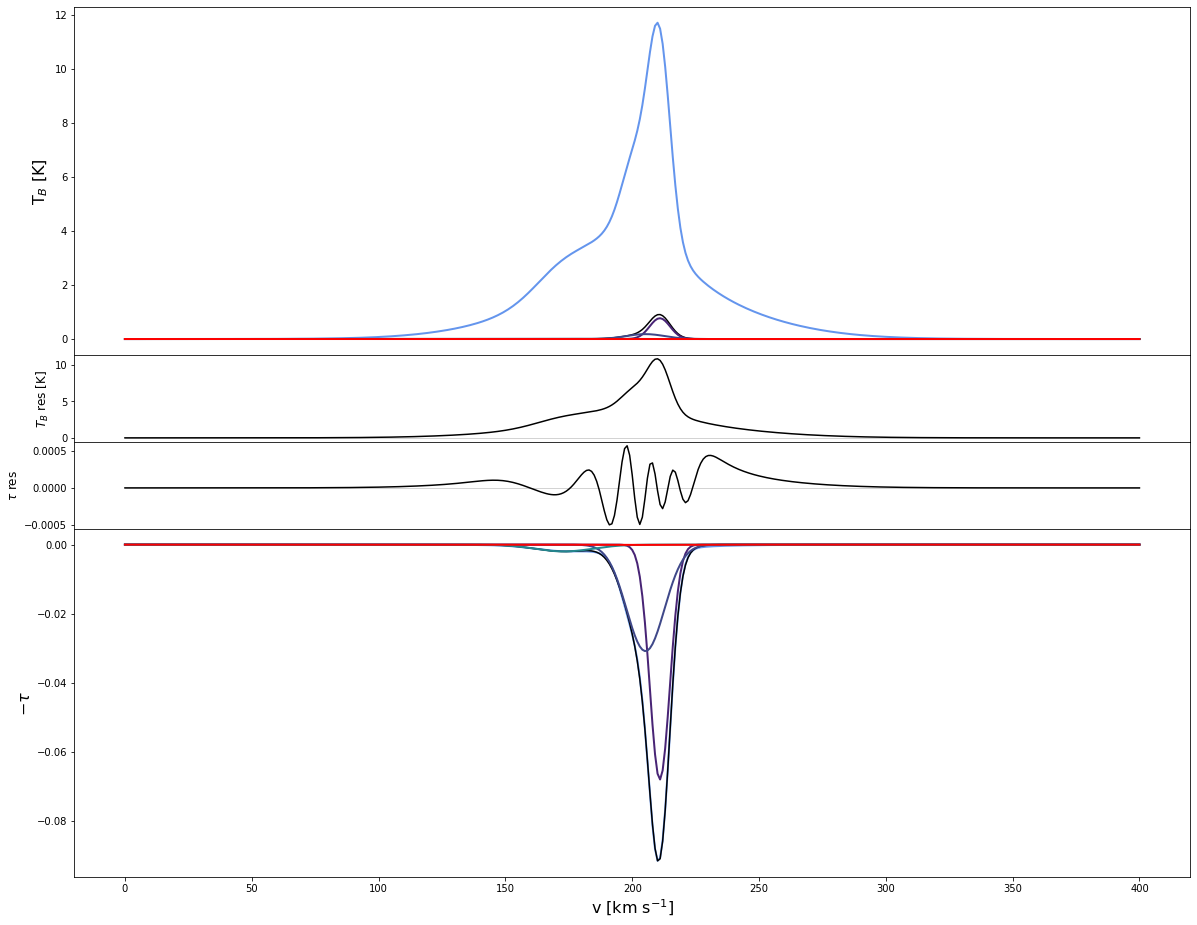

Gaussian 5 initialised as:
[[6.27361878e+00 0.00000000e+00 0.00000000e+00]
 [5.66832180e-04 1.98000000e+02 1.33090752e+01]]
Preferenced lambdas: 6.101120993690128e-07, 80000.0
Threshold reached at 5
********************
Fitted parameters
[[1.17227376e+01 0.00000000e+00 0.00000000e+00 5.98890317e+00
  0.00000000e+00 0.00000000e+00 3.09703657e+00 0.00000000e+00
  0.00000000e+00 6.27361221e+00 0.00000000e+00 0.00000000e+00
  1.08194244e+01 2.10000000e+02 1.11668851e+01]
 [8.47693723e-02 2.10651145e+02 4.22926576e+00 2.04711751e-02
  2.01182693e+02 5.28571727e+00 1.78250471e-03 1.73077862e+02
  1.16176411e+01 1.04996402e-03 1.98003134e+02 1.36074248e+01
  1.98979786e-03 2.10089653e+02 1.14845330e+01]]
********************


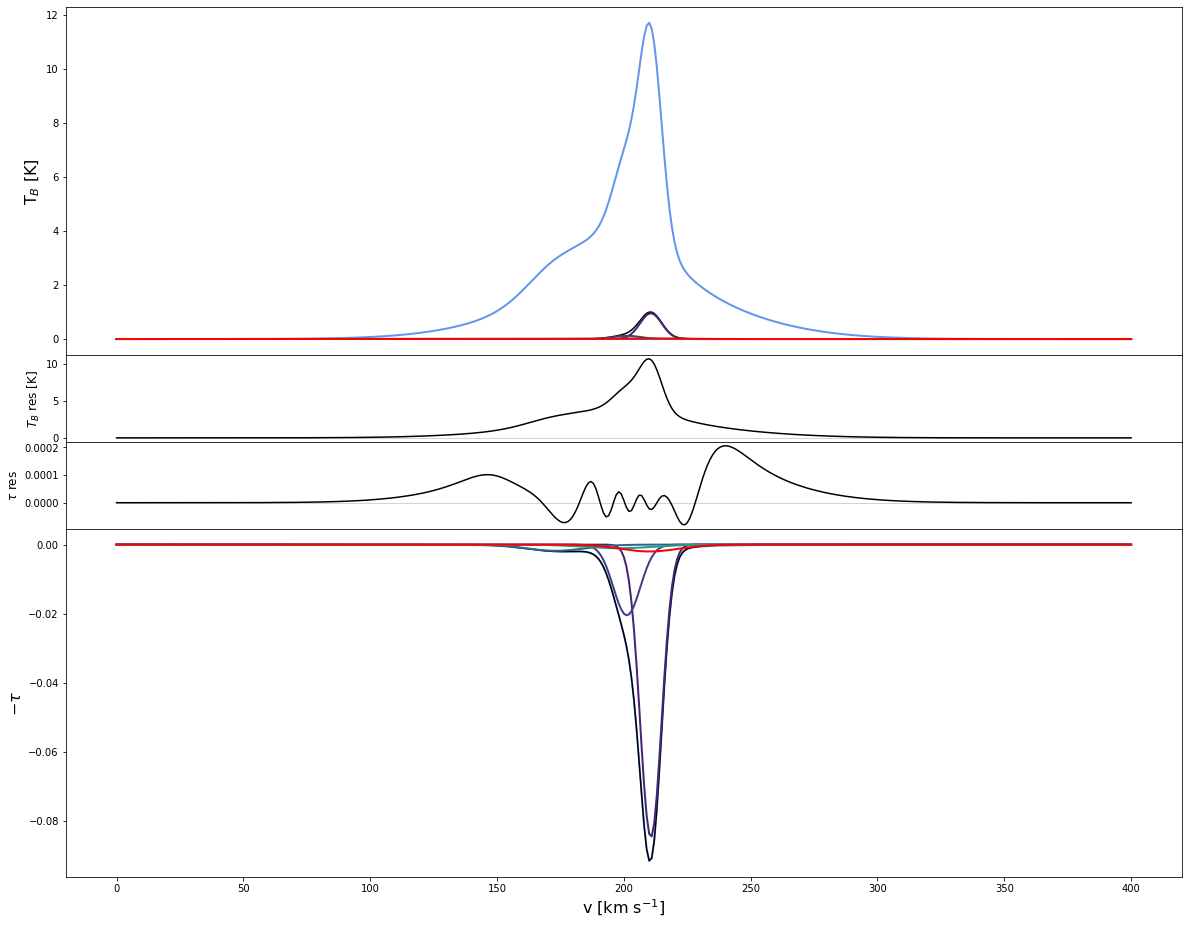

Gaussian 6 initialised as:
[[1.07226928e+01 2.10000000e+02 1.12122624e+01]
 [2.22711252e-05 2.10000000e+02 1.12122624e+01]]
Unpreferenced lambdas: 6.101120993690128e-07, 10000.0
********************
Fitted parameters
[[1.17227376e+01 0.00000000e+00 0.00000000e+00 5.98890317e+00
  0.00000000e+00 0.00000000e+00 3.09703657e+00 0.00000000e+00
  0.00000000e+00 6.27361221e+00 0.00000000e+00 0.00000000e+00
  1.08194244e+01 2.10000000e+02 1.11668851e+01 1.07226928e+01
  2.10000000e+02 1.12122624e+01]
 [8.47694167e-02 2.10651145e+02 4.22926578e+00 2.04711416e-02
  2.01182693e+02 5.28571726e+00 1.78249757e-03 1.73077862e+02
  1.16176416e+01 1.04998631e-03 1.98003134e+02 1.36074248e+01
  1.98978197e-03 2.10089653e+02 1.14845333e+01 0.00000000e+00
  2.10000000e+02 1.12122624e+01]]
********************


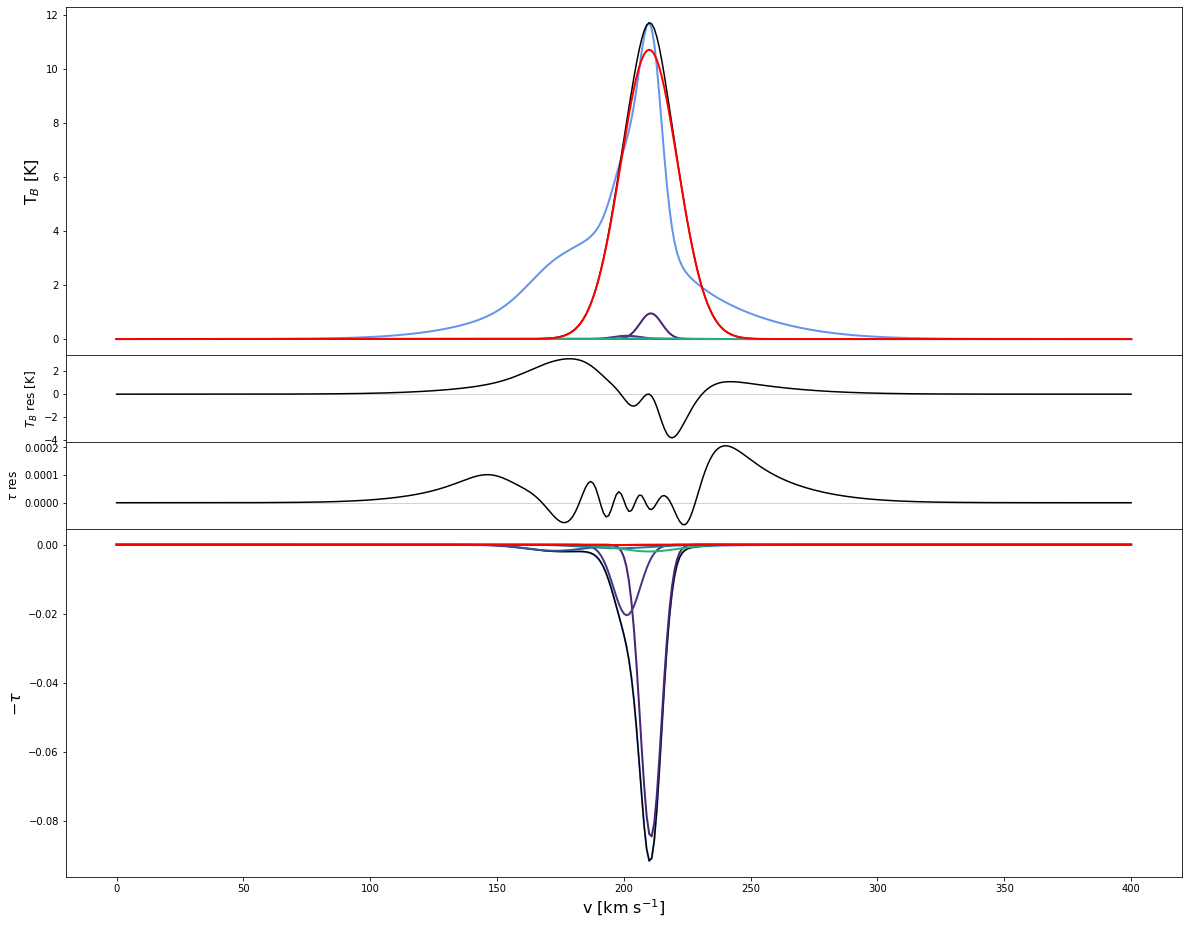

The initial log magnitudes of each component are:
[ 3. -3.]
The adjusted magnitudes are:
[4.97453096e-07 1.00000000e+04]


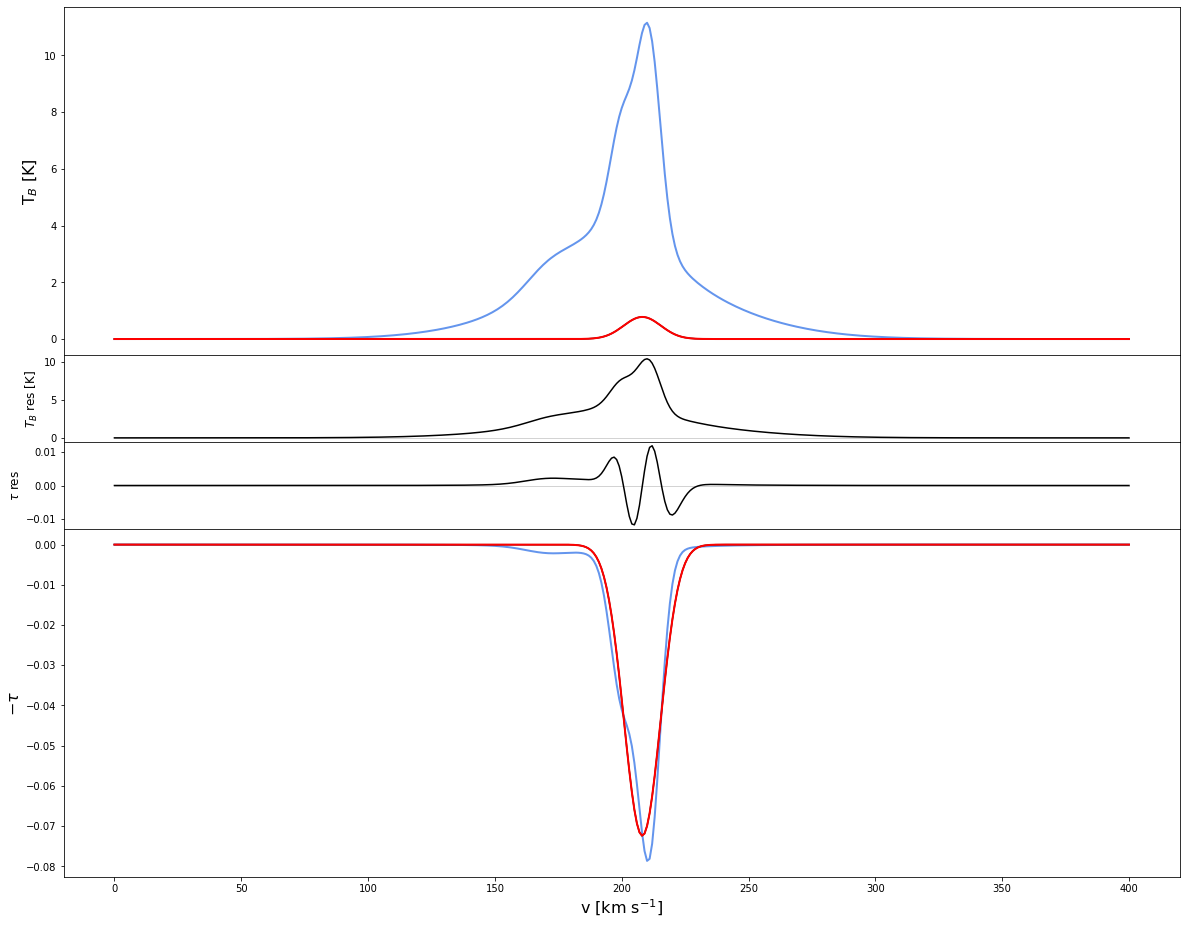

Gaussian 2 initialised as:
[[9.81994372e+00 0.00000000e+00 0.00000000e+00]
 [1.17971460e-02 2.12000000e+02 8.35356626e+00]]
Preferenced lambdas: 4.97453096019364e-07, 80000.0
Threshold reached at 2
********************
Fitted parameters
[[1.11521261e+01 0.00000000e+00 0.00000000e+00 1.03984300e+01
  2.10000000e+02 1.13967095e+01]
 [7.24089029e-02 2.08116204e+02 7.20444198e+00 0.00000000e+00
  2.09999978e+02 1.13967093e+01]]
********************


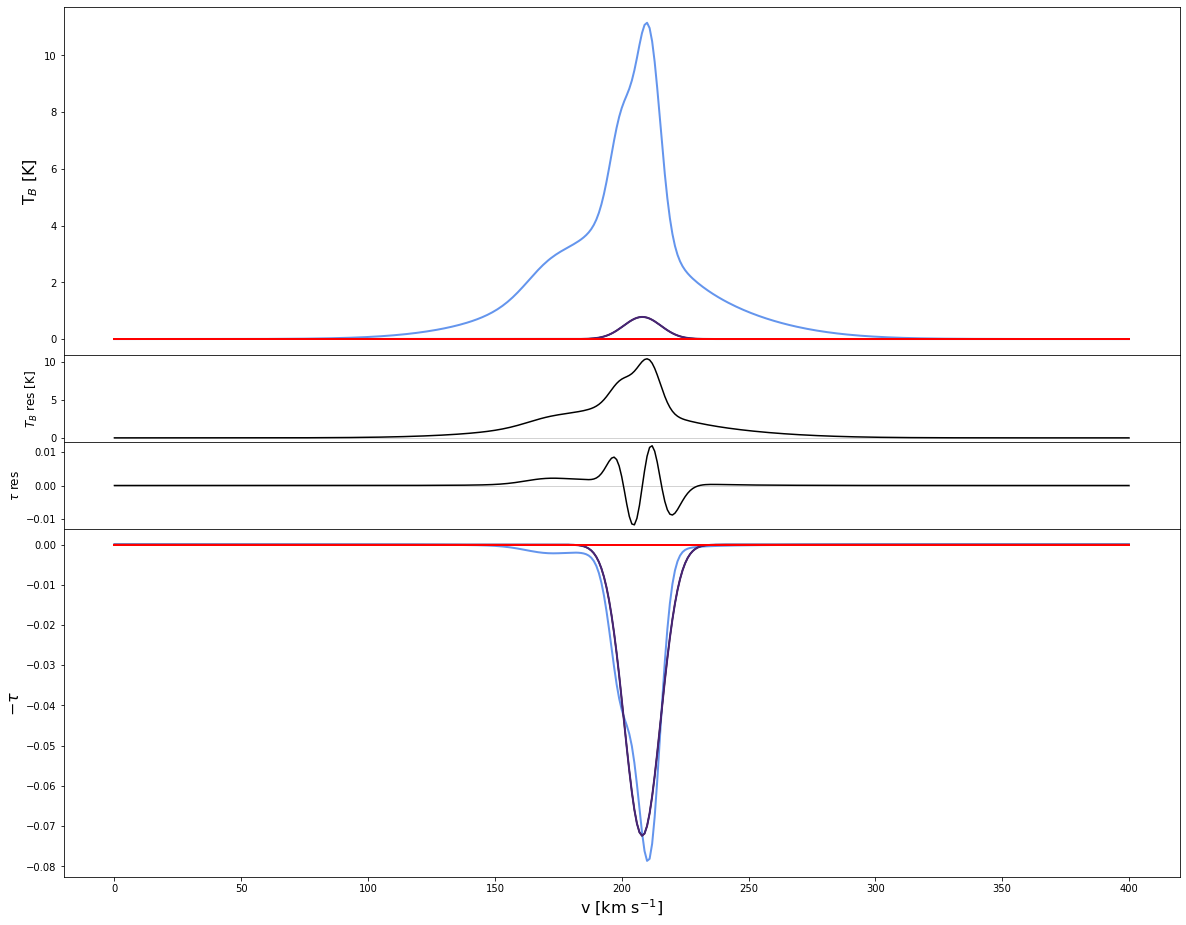

Gaussian 3 initialised as:
[[1.03984288e+01 2.10000000e+02 1.13967102e+01]
 [8.68091258e-03 2.10000000e+02 1.13967102e+01]]
Unpreferenced lambdas: 4.97453096019364e-07, 10000.0
********************
Fitted parameters
[[1.11521261e+01 0.00000000e+00 0.00000000e+00 1.03984300e+01
  2.10000000e+02 1.13967095e+01 1.03984288e+01 2.10000000e+02
  1.13967102e+01]
 [7.24089201e-02 2.08116222e+02 7.20443562e+00 0.00000000e+00
  2.09999978e+02 1.13967093e+01 0.00000000e+00 2.09999970e+02
  1.13967123e+01]]
********************


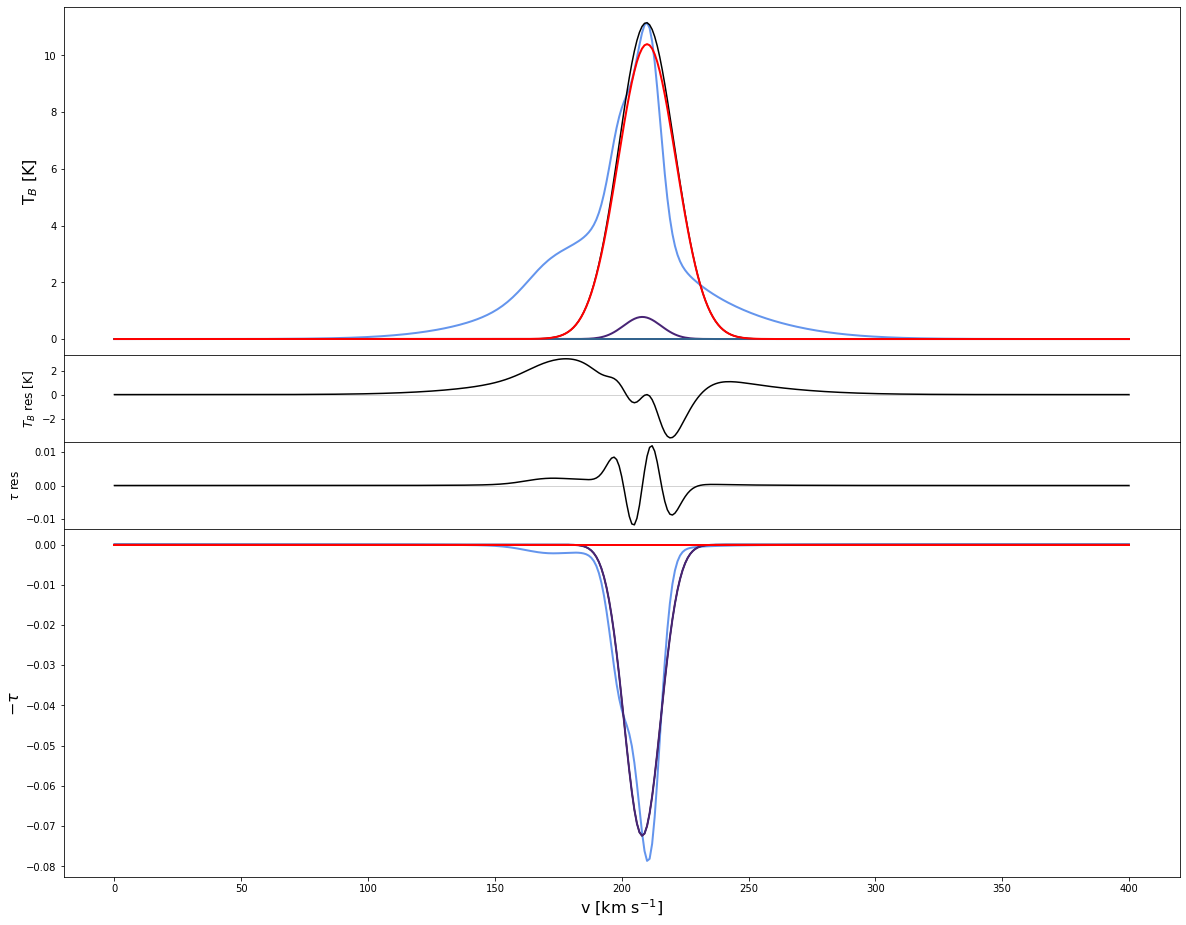

Gaussian 4 initialised as:
[[2.98723343e+00 1.78000000e+02 1.44221920e+01]
 [2.05032055e-03 1.78000000e+02 1.44221920e+01]]
Unpreferenced lambdas: 4.97453096019364e-07, 10000.0
********************
Fitted parameters
[[1.11521259e+01 0.00000000e+00 0.00000000e+00 1.03984300e+01
  2.10000000e+02 1.13967095e+01 1.03984229e+01 2.09999997e+02
  1.13967072e+01 2.98723357e+00 1.78000000e+02 1.44221919e+01]
 [7.25764651e-02 2.08267556e+02 7.03760467e+00 0.00000000e+00
  2.09999978e+02 1.13967093e+01 0.00000000e+00 2.09999970e+02
  1.13967123e+01 3.12262819e-03 1.78009309e+02 1.44291781e+01]]
********************


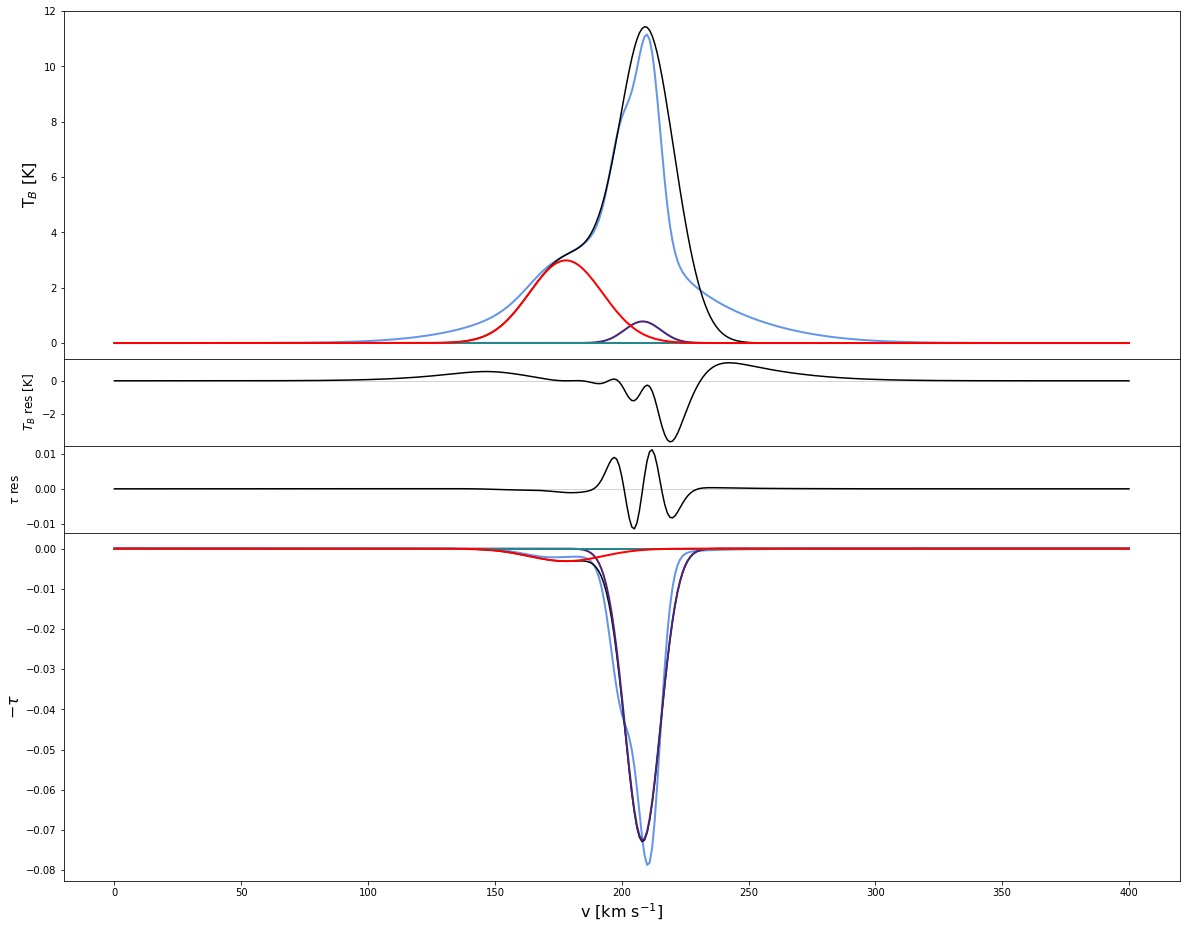

Gaussian 5 initialised as:
[[6.09717100e-01 2.12000000e+02 2.16450931e+01]
 [1.11638349e-02 2.12000000e+02 2.16450931e+01]]
Unpreferenced lambdas: 4.97453096019364e-07, 10000.0


/data/francesbw/myenv/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


********************
Fitted parameters
[[1.11528287e+01 0.00000000e+00 0.00000000e+00 1.03984300e+01
  2.10000000e+02 1.13967095e+01 1.04074627e+01 2.10001928e+02
  1.14014990e+01 2.98864951e+00 1.78001161e+02 1.44230081e+01
  6.20964786e-01 2.11999984e+02 2.16457037e+01]
 [7.38942245e-02 2.10802505e+02 4.40196074e+00 0.00000000e+00
  2.09999968e+02 1.13967068e+01 0.00000000e+00 2.09999960e+02
  1.13967098e+01 3.55580293e-02 2.00263630e+02 4.73270324e+00
  1.81171095e-03 1.97280049e+02 3.41580730e+01]]
********************


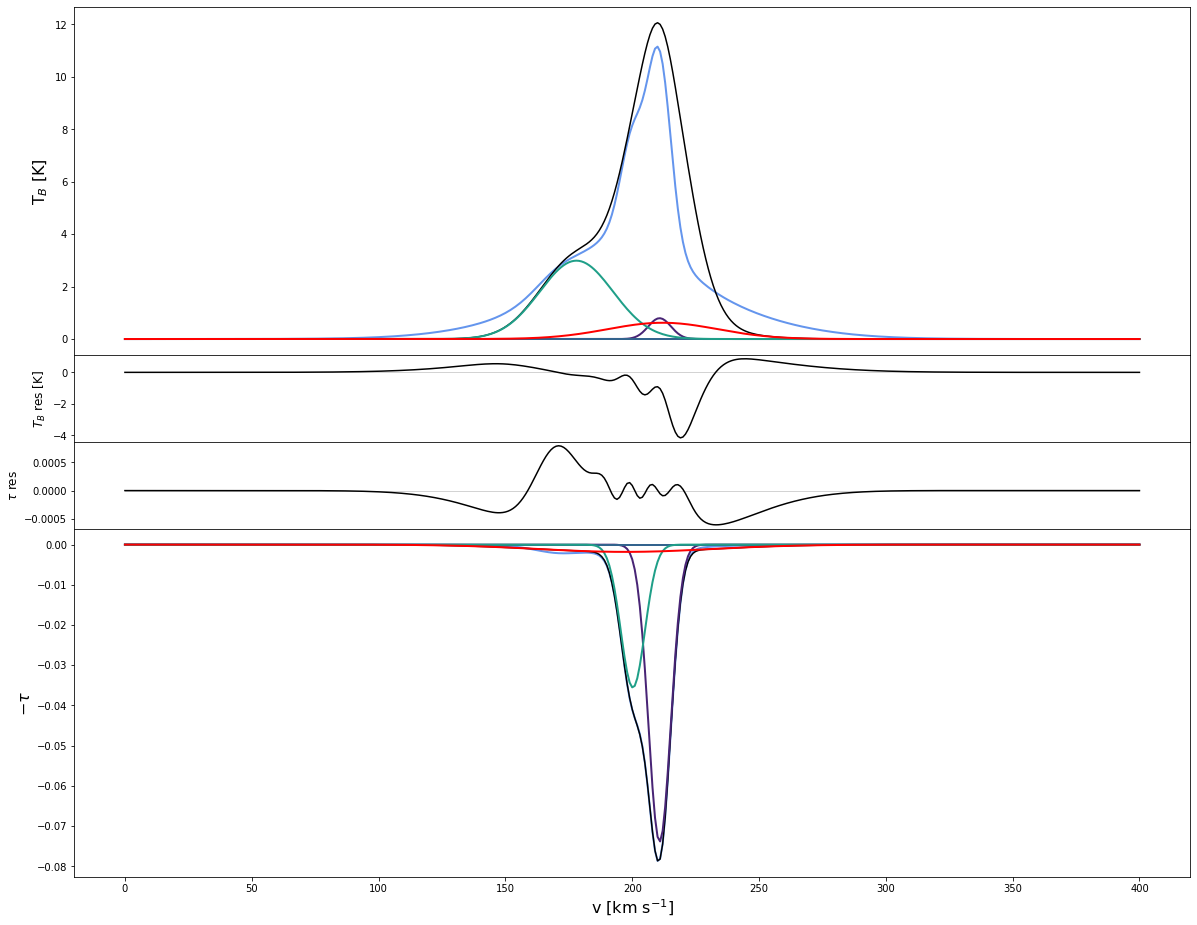

Gaussian 6 initialised as:
[[8.60099570e-01 2.44000000e+02 2.68978673e+01]
 [4.87474081e-04 2.44000000e+02 2.68978673e+01]]
Unpreferenced lambdas: 4.97453096019364e-07, 10000.0
********************
Fitted parameters
[[1.11528273e+01 0.00000000e+00 0.00000000e+00 1.03984300e+01
  2.10000000e+02 1.13967095e+01 1.04074139e+01 2.10001909e+02
  1.14014678e+01 2.98864226e+00 1.78001158e+02 1.44230054e+01
  6.20896968e-01 2.11999984e+02 2.16457032e+01 8.60051624e-01
  2.44000001e+02 2.68978659e+01]
 [7.38898281e-02 2.10802554e+02 4.40321437e+00 0.00000000e+00
  2.09999968e+02 1.13967068e+01 0.00000000e+00 2.09999960e+02
  1.13967098e+01 3.55308393e-02 2.00255746e+02 4.74124924e+00
  1.80240997e-03 1.97268443e+02 3.41455033e+01 0.00000000e+00
  2.44000001e+02 2.68978762e+01]]
********************


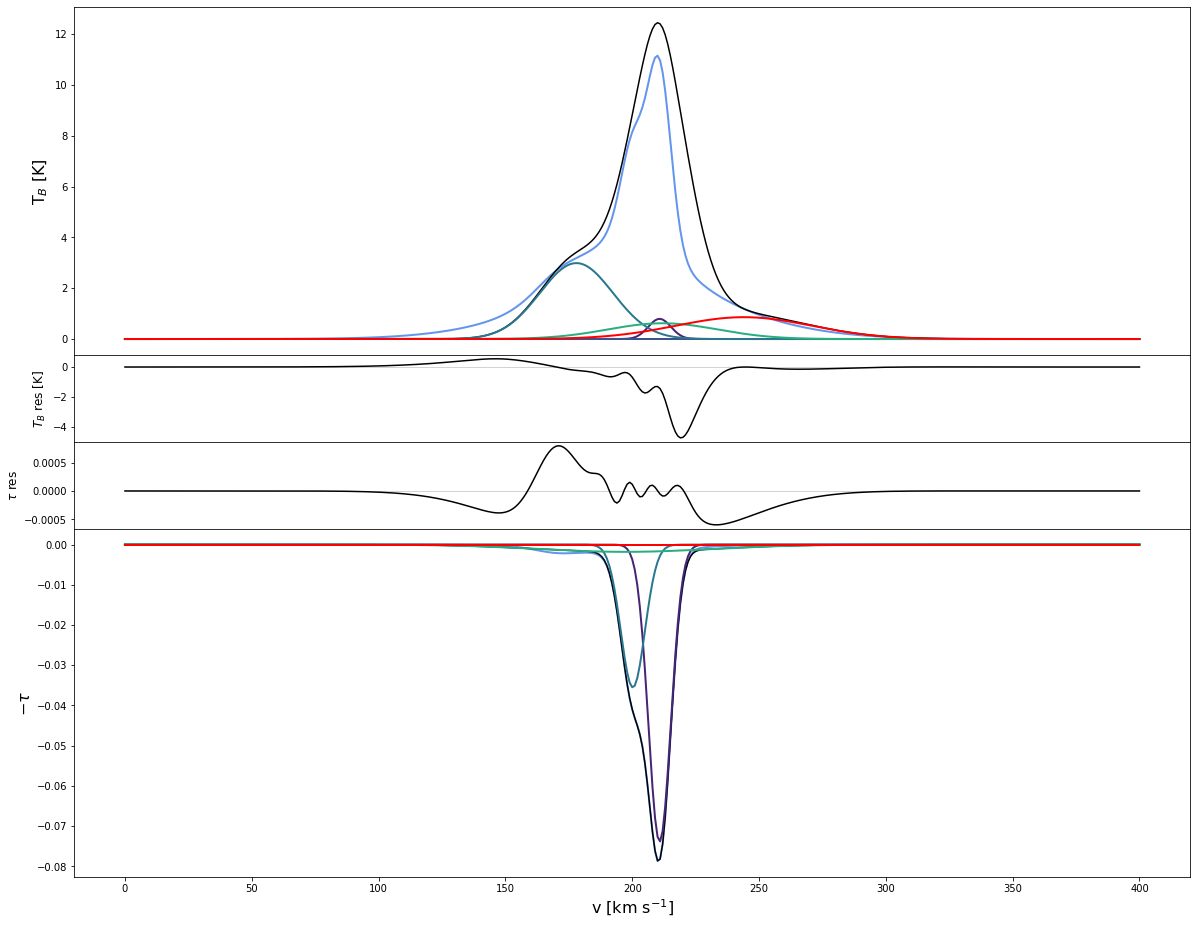

In [23]:
for i in np.arange(2):
    for j in np.arange(2):
        solution = iterative(np.array([cube[:,j,i], tau[:,j,i]]), 6, init_tau_pref=8)
        key = "pix_{}_{}".format(i+1,j+1)
        solution_map[key]=solution

<a id='sampplot'></a>
#### Plot results for a sample

The selected pixels are x=2, y=2
The regime change occurs at n=2
[[1.11528273e+01 0.00000000e+00 0.00000000e+00 1.03984300e+01
  2.10000000e+02 1.13967095e+01 1.04074139e+01 2.10001909e+02
  1.14014678e+01 2.98864226e+00 1.78001158e+02 1.44230054e+01
  6.20896968e-01 2.11999984e+02 2.16457032e+01 8.60051624e-01
  2.44000001e+02 2.68978659e+01]
 [7.38898281e-02 2.10802554e+02 4.40321437e+00 0.00000000e+00
  2.09999968e+02 1.13967068e+01 0.00000000e+00 2.09999960e+02
  1.13967098e+01 3.55308393e-02 2.00255746e+02 4.74124924e+00
  1.80240997e-03 1.97268443e+02 3.41455033e+01 0.00000000e+00
  2.44000001e+02 2.68978762e+01]]


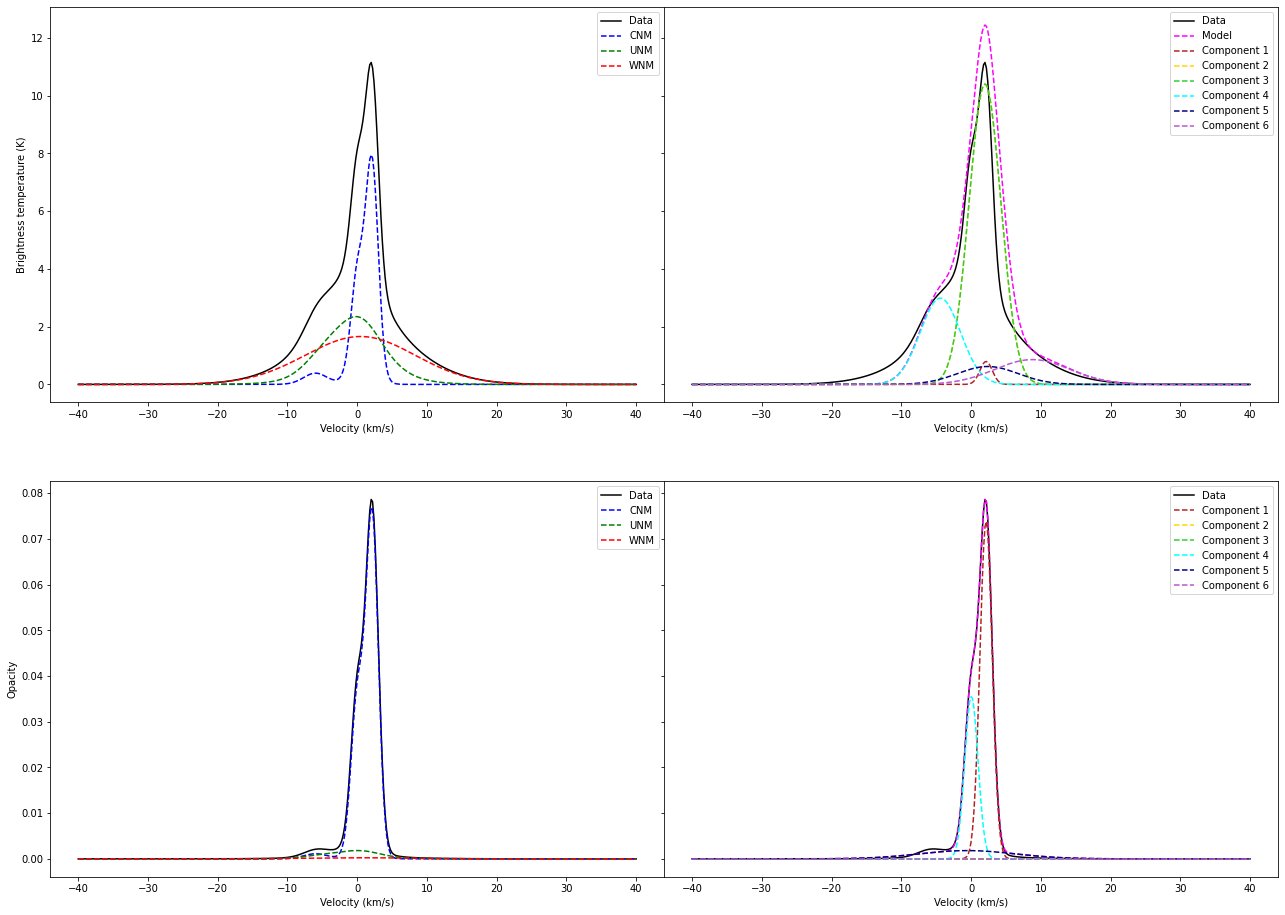

The selected pixels are x=1, y=1
The regime change occurs at n=6
[[1.13052705e+01 0.00000000e+00 0.00000000e+00 5.87705158e+00
  0.00000000e+00 0.00000000e+00 3.22035579e+00 0.00000000e+00
  0.00000000e+00 1.96563397e+00 0.00000000e+00 0.00000000e+00
  6.12874677e+00 0.00000000e+00 0.00000000e+00 1.04503165e+01
  2.10000000e+02 1.14554417e+01]
 [6.88445817e-02 2.10790611e+02 4.02924765e+00 2.55903285e-02
  2.04693744e+02 7.40074006e+00 2.06660275e-03 1.73052459e+02
  1.19535827e+01 4.10327085e-04 2.30009917e+02 1.42028527e+01
  0.00000000e+00 1.98000000e+02 9.71953906e+00 1.51220788e-04
  2.10000001e+02 1.14554430e+01]]


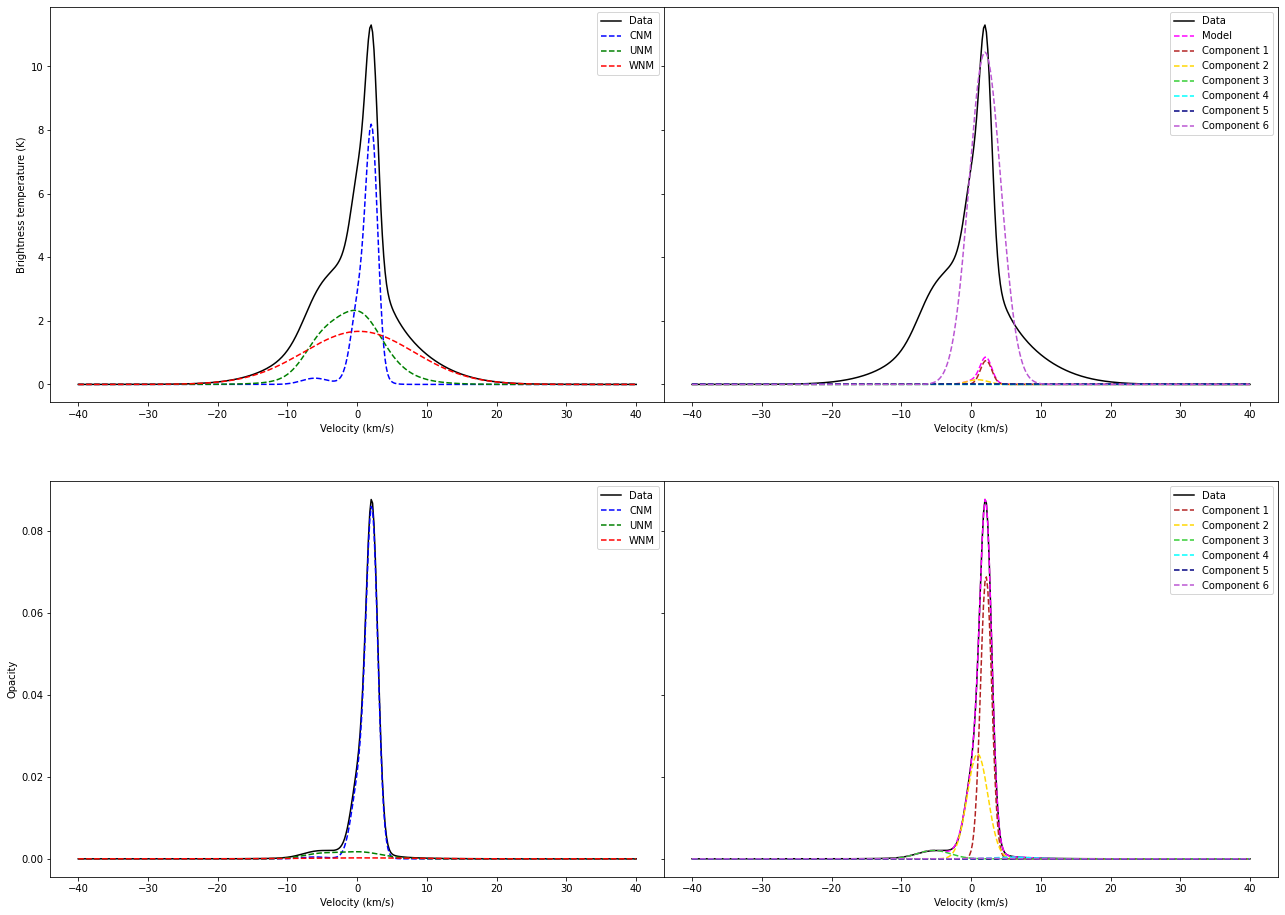

In [24]:
for i in np.arange(2):
    x,y = [int(np.random.random(1)*2),int(np.random.random(1)*2)]
    print('The selected pixels are x={}, y={}'.format(str(x+1), str(y+1)))
    plot_synth_comp(x+1,y+1, 6)

In [ ]:
len(solution_map)

<a id='masynth'></a>
### Testing the synthetic data from Marc-Antoine

Read in other synthetic data

In [ ]:
raw_data=np.loadtxt('synthetic_HI_Tb_and_tau_v2.txt')

In [ ]:
v=raw_data[:,0]
Tb=raw_data[:,1]
rms_Tb=raw_data[:,2]
tau_1=raw_data[:,3]
rms_tau=raw_data[:,4]
plot_data(Tb, tau_1)

In [ ]:
solution=iterative(np.array([Tb, tau_1]), 8)

In [ ]:
solution

<a id='sponge'></a>
### Comparison with SPONGE-21 data

Load it in

In [25]:
path = ''
name = '3C041A'


cat = fits.getdata(path+"all_sponge_sources_table_tighter.fits")
data_s = pytabs.Table(cat)
idx_absline=np.where(data_s["NAMES"]==name)[0][0]
#idx_absline = np.random.randint(57)
nan_values=np.isnan(data_s[idx_absline]["VEL"])
numeric_values=[not i for i in nan_values]
v = data_s[idx_absline]["VEL"][numeric_values]
#correct velocities to model over
chiller_vel_idx=np.intersect1d(np.where(v>-100.),np.where(v<80.))

#initialise the reduced data
v = v[chiller_vel_idx]
Tb_sponge = data_s[idx_absline]["TB"][numeric_values][chiller_vel_idx]
tau_sponge = data_s[idx_absline]["TAU"][numeric_values][chiller_vel_idx]
e_tau=np.exp(-tau)
rms_Tb=data_s[idx_absline]['SIG_TB'][numeric_values][chiller_vel_idx]
rms_tau=data_s[idx_absline]['SIG_TAU'][numeric_values][chiller_vel_idx]

The initial log magnitudes of each component are:
[5. 3.]
The adjusted magnitudes are:
[0.0001 0.01  ]


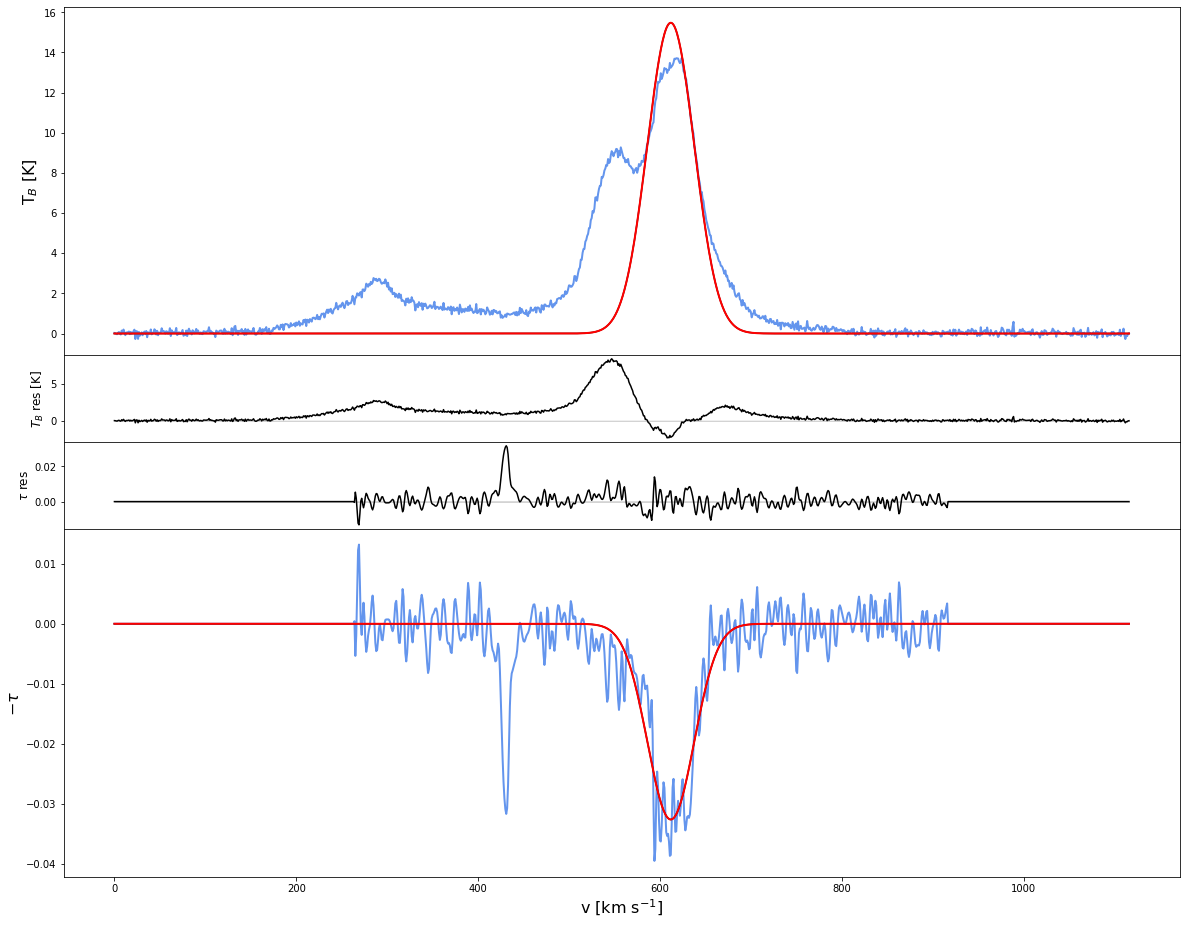

Gaussian 2 initialised as:
[[8.25532437e-01 0.00000000e+00 0.00000000e+00]
 [3.16463567e-02 4.31000000e+02 6.12115262e+00]]
Preferenced lambdas: 0.0001, 0.05
********************
Fitted parameters
[[4.82862829e+02 0.00000000e+00 0.00000000e+00 8.27973248e-01
  0.00000000e+00 0.00000000e+00]
 [3.25766977e-02 6.11996178e+02 2.56498973e+01 3.04820814e-02
  4.30451724e+02 4.33162642e+00]]
********************


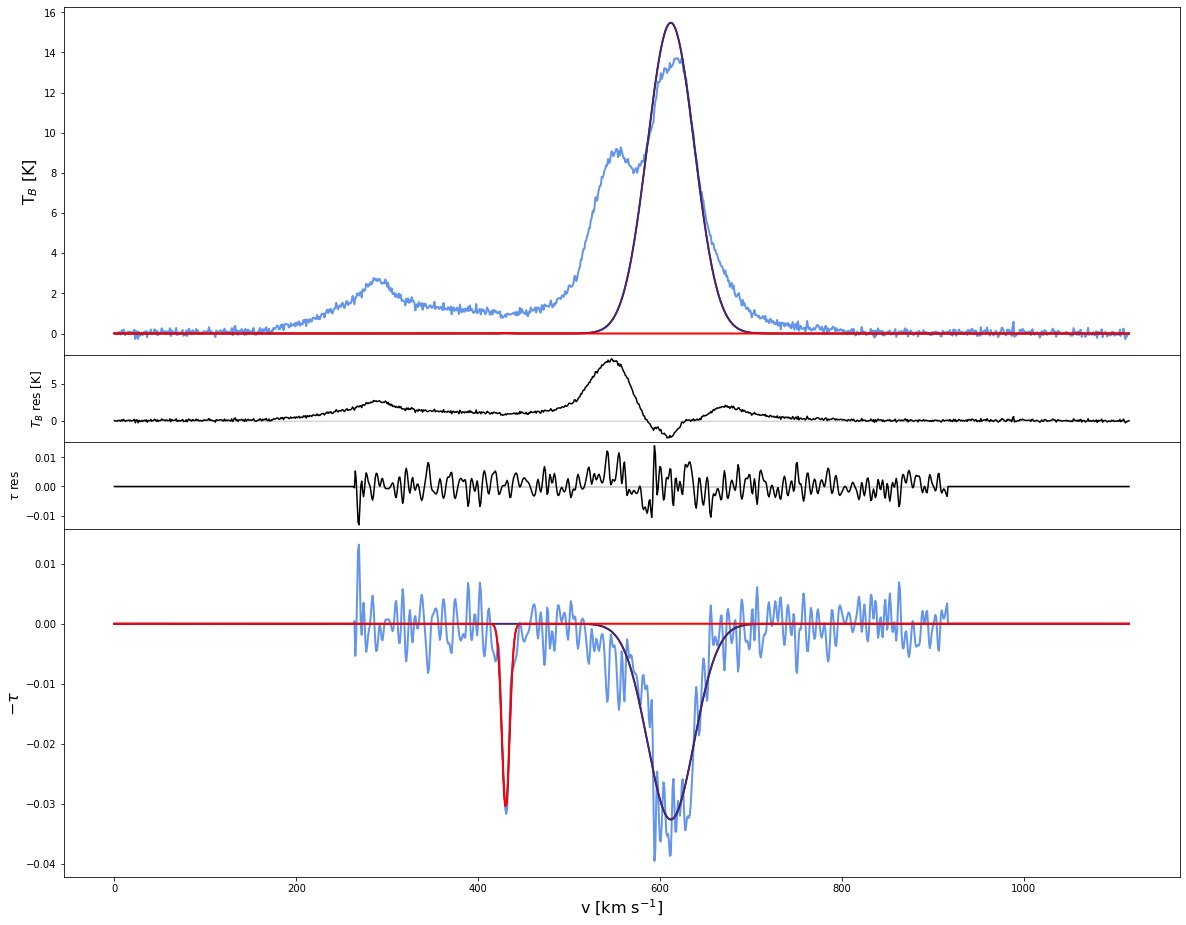

Gaussian 3 initialised as:
[[9.62452762e-01 0.00000000e+00 0.00000000e+00]
 [1.39932150e-02 5.94000000e+02 1.35459584e+01]]
Preferenced lambdas: 0.0001, 0.05
Threshold reached at 3
********************
Fitted parameters
[[4.82994040e+02 0.00000000e+00 0.00000000e+00 9.33212334e-01
  0.00000000e+00 0.00000000e+00 8.51301005e+00 5.47000000e+02
  1.43492016e+01]
 [2.71861023e-02 6.06510526e+02 3.63663507e+01 3.05713546e-02
  4.30452591e+02 4.30686983e+00 0.00000000e+00 5.46820324e+02
  1.44563637e+01]]
********************


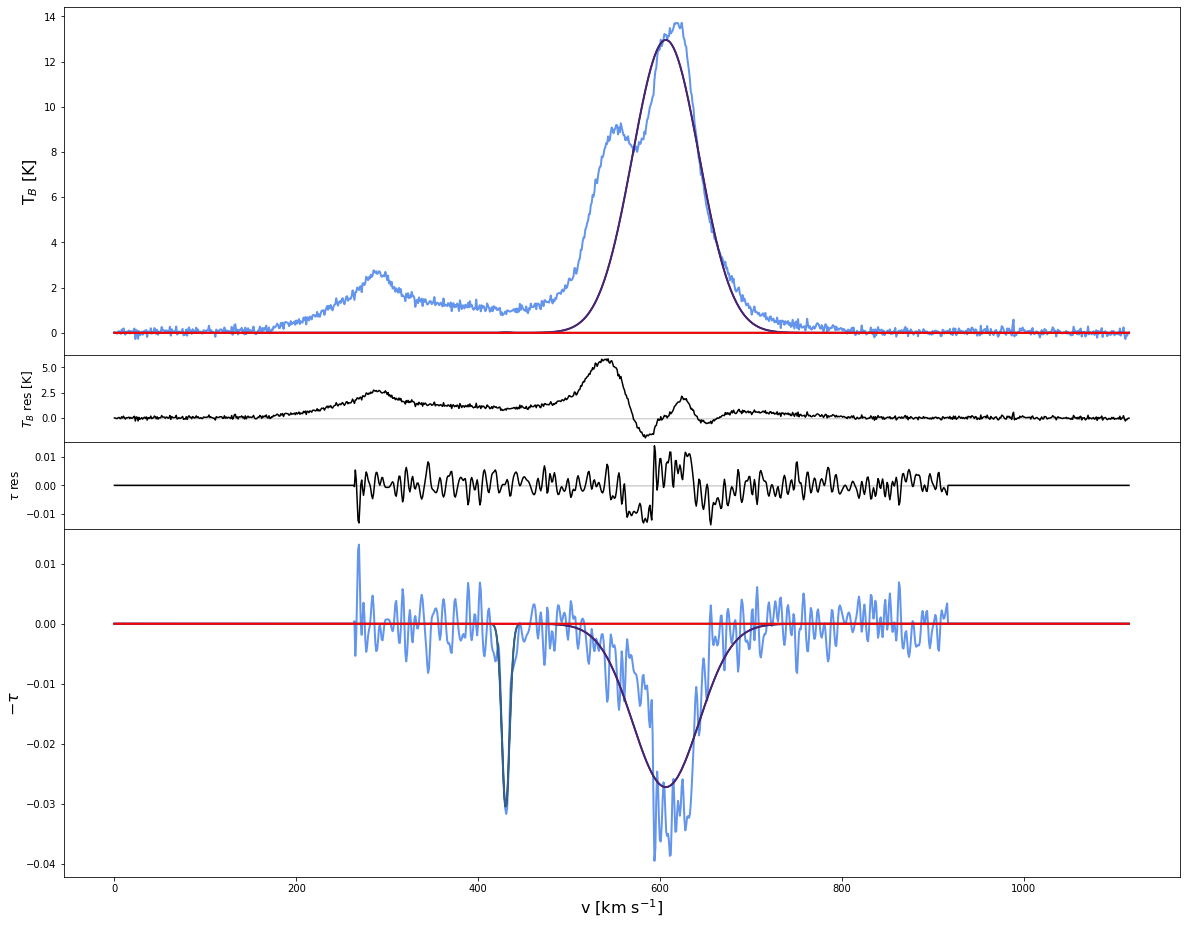

Gaussian 4 initialised as:
[[5.84167132e+00 5.43000000e+02 1.45341157e+01]
 [6.50313401e-03 5.43000000e+02 1.45341157e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82824414e+02 0.00000000e+00 0.00000000e+00 1.15070735e+00
  0.00000000e+00 0.00000000e+00 8.51437060e+00 5.47000000e+02
  1.43492016e+01 8.32088313e+00 5.43923845e+02 2.52410232e+01]
 [3.18672345e-02 6.14498461e+02 2.43583548e+01 3.04727759e-02
  4.30462719e+02 4.33509727e+00 6.55662521e-03 5.46536816e+02
  1.42924314e+01 0.00000000e+00 5.41477976e+02 1.08576238e+01]]
********************


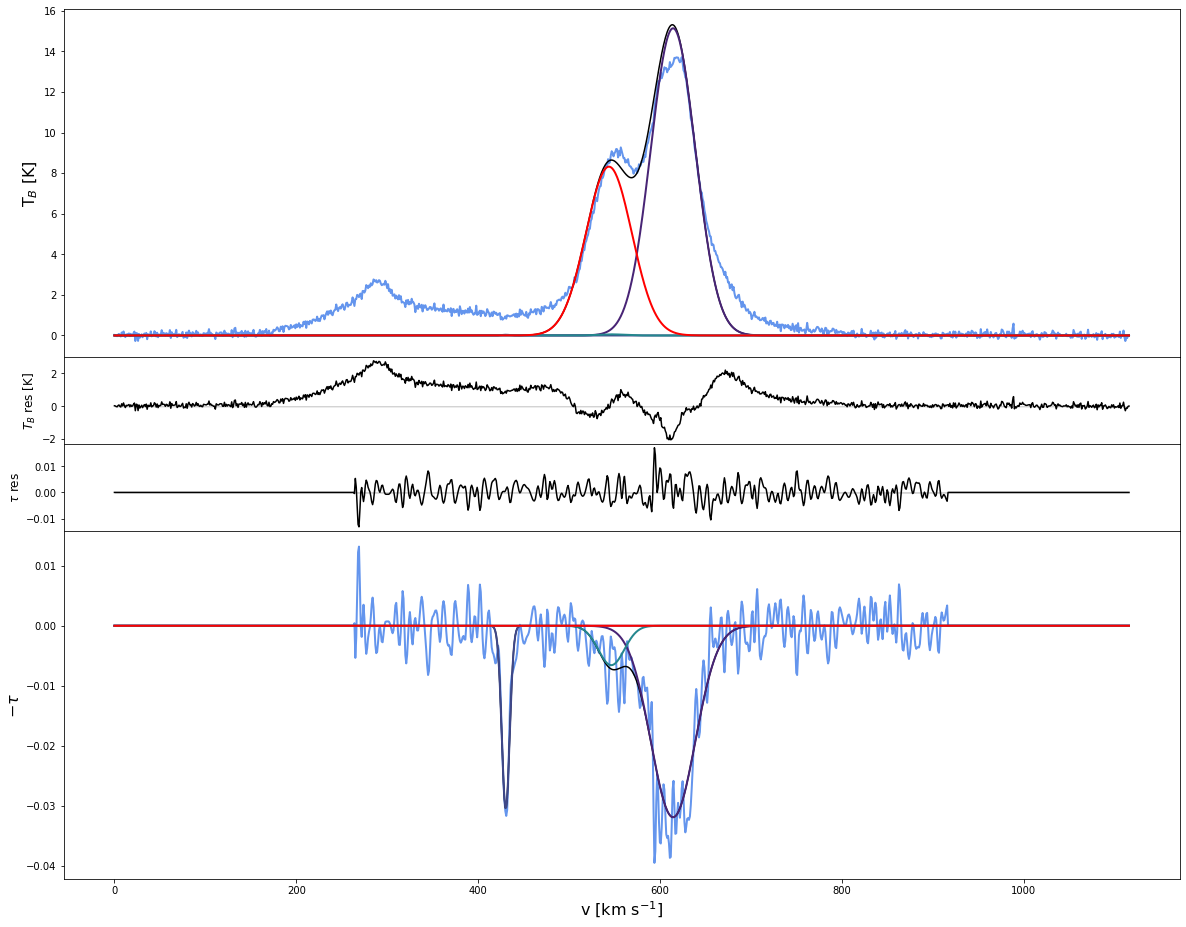

Gaussian 5 initialised as:
[[6.60989773e-01 5.94000000e+02 2.31445141e+01]
 [1.70712553e-02 5.94000000e+02 2.31445141e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82186401e+02 0.00000000e+00 0.00000000e+00 2.69113847e+00
  0.00000000e+00 0.00000000e+00 8.54388442e+00 5.47000000e+02
  1.43492016e+01 8.53972306e+00 5.56525014e+02 3.82089067e+01
  5.49573955e-02 5.93744164e+02 2.32552112e+01]
 [2.42516066e-02 6.21541723e+02 2.21917823e+01 3.01991680e-02
  4.30579816e+02 4.41858626e+00 7.19395907e-03 5.43605672e+02
  1.47493505e+01 0.00000000e+00 5.41476420e+02 1.08650951e+01
  1.49145442e-02 6.02532573e+02 1.69747883e+01]]
********************


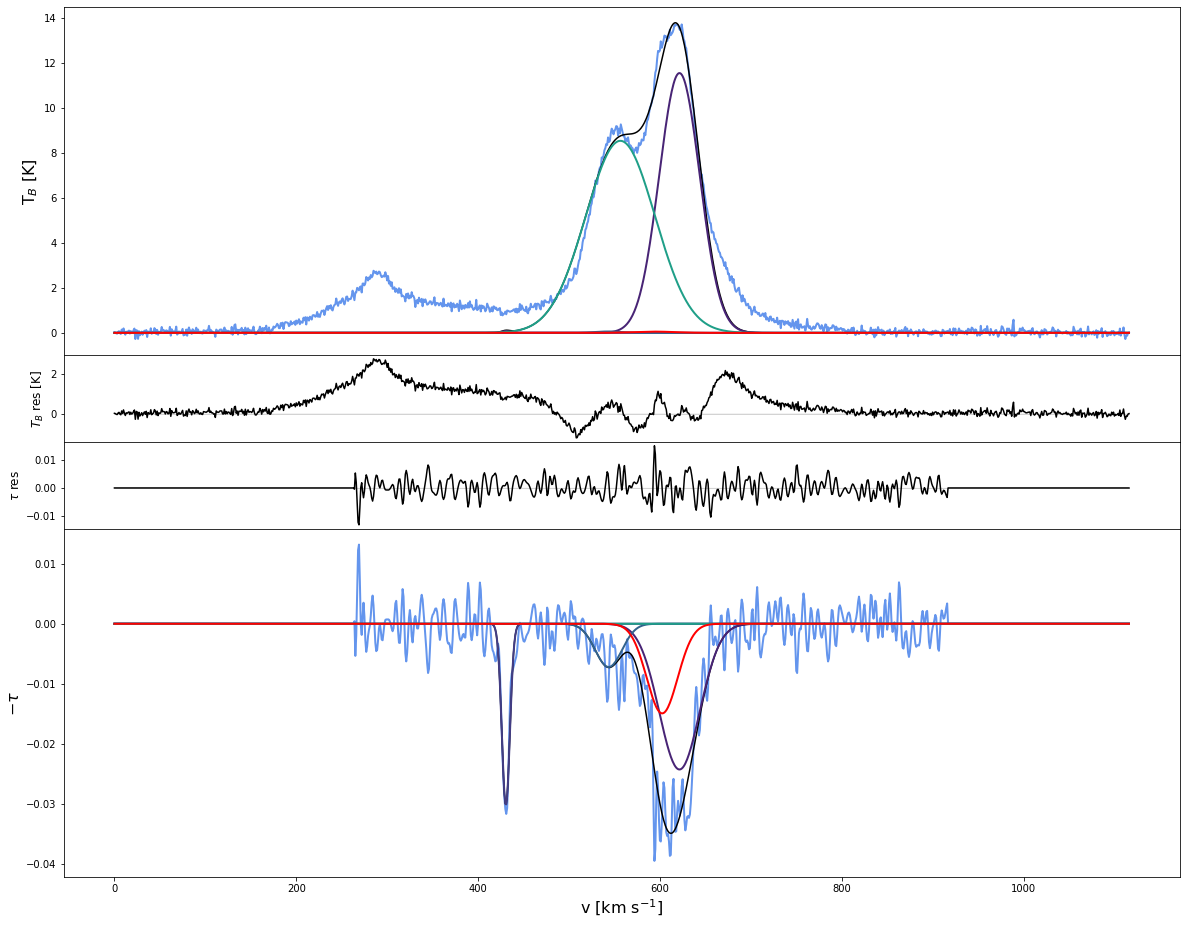

Gaussian 6 initialised as:
[[4.62812569e-01 5.94000000e+02 1.76256763e+01]
 [1.50696701e-02 5.94000000e+02 1.76256763e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82387033e+02 0.00000000e+00 0.00000000e+00 3.08557295e+00
  0.00000000e+00 0.00000000e+00 8.63100290e+00 5.47000000e+02
  1.43492016e+01 8.27539230e+00 5.57376628e+02 3.95457527e+01
  0.00000000e+00 5.93744106e+02 2.32552423e+01 0.00000000e+00
  5.94117027e+02 1.75459274e+01]
 [2.42131110e-02 6.20774940e+02 2.19283361e+01 3.06734563e-02
  4.30392946e+02 4.27740940e+00 6.85796747e-03 5.47553673e+02
  1.73575208e+01 0.00000000e+00 5.41476420e+02 1.08650950e+01
  1.40308525e-02 6.03421506e+02 1.78128799e+01 0.00000000e+00
  5.93921483e+02 1.81584096e+01]]
********************


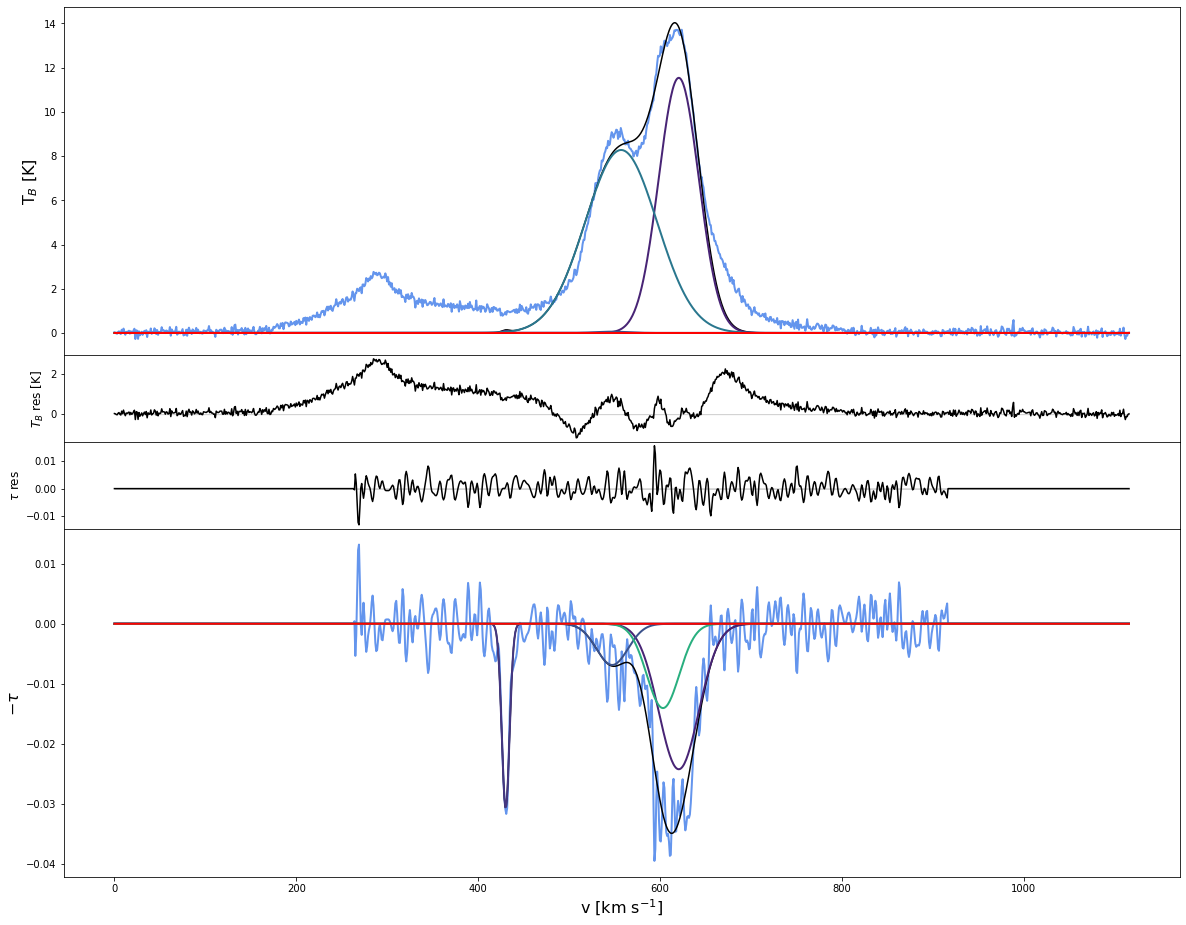

Gaussian 7 initialised as:
[[2.78477572e-01 5.94000000e+02 2.43513978e+01]
 [1.55822435e-02 5.94000000e+02 2.43513978e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82618017e+02 0.00000000e+00 0.00000000e+00 3.52491836e+00
  0.00000000e+00 0.00000000e+00 8.72851502e+00 5.47000000e+02
  1.43492016e+01 8.39255974e+00 5.59051347e+02 4.13482571e+01
  2.64718532e-02 5.93744148e+02 2.32552998e+01 0.00000000e+00
  5.94117035e+02 1.75459235e+01 0.00000000e+00 5.94053767e+02
  2.44845363e+01]
 [2.31481718e-02 6.22093062e+02 2.19620673e+01 3.06090377e-02
  4.30494089e+02 4.29925610e+00 7.01220951e-03 5.48755561e+02
  1.67444587e+01 0.00000000e+00 5.41476438e+02 1.08651183e+01
  1.48553849e-02 6.04161495e+02 1.52904567e+01 0.00000000e+00
  5.93921484e+02 1.81584100e+01 1.77951195e-03 5.94080914e+02
  2.36425610e+01]]
********************


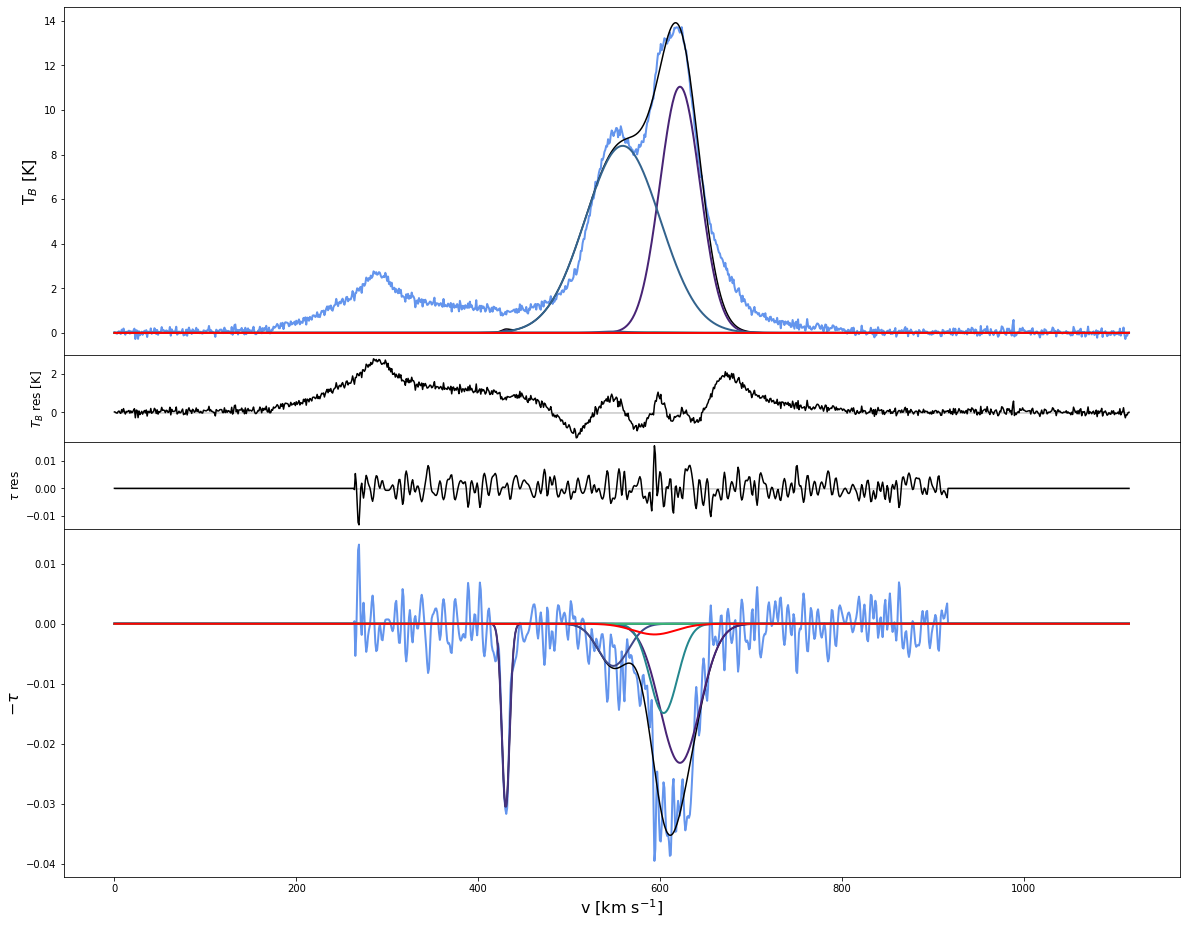

Gaussian 8 initialised as:
[[3.76141148e-01 5.94000000e+02 2.10823518e+01]
 [1.53745673e-02 5.94000000e+02 2.10823518e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82681733e+02 0.00000000e+00 0.00000000e+00 3.80574101e+00
  0.00000000e+00 0.00000000e+00 8.80261167e+00 5.47000000e+02
  1.43492016e+01 8.33706940e+00 5.60288001e+02 4.22322215e+01
  0.00000000e+00 5.93744143e+02 2.32553060e+01 0.00000000e+00
  5.94117035e+02 1.75459235e+01 0.00000000e+00 5.94053767e+02
  2.44845363e+01 0.00000000e+00 5.94016223e+02 2.10782958e+01]
 [2.24853157e-02 6.22021724e+02 2.19391994e+01 3.02989782e-02
  4.30547740e+02 4.39888034e+00 7.07466455e-03 5.49159075e+02
  1.71344920e+01 0.00000000e+00 5.41476438e+02 1.08651210e+01
  1.59906752e-02 6.04653783e+02 1.66152141e+01 2.01987735e-05
  5.93921484e+02 1.81584104e+01 2.92667847e-04 5.94092856e+02
  2.36332017e+01 3.55486405e-04 5.93992545e+02 2.11373181e+01]]
********************


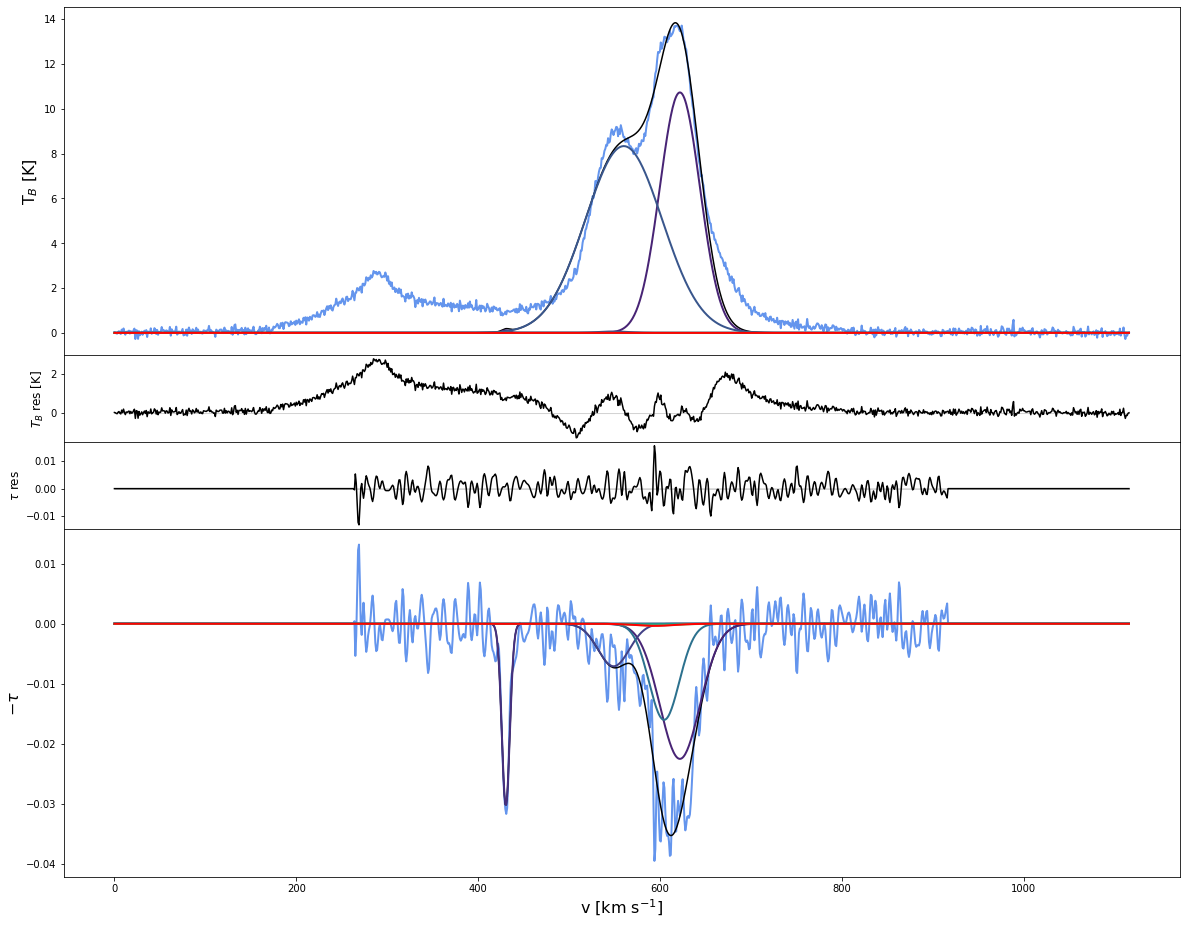

Gaussian 9 initialised as:
[[3.38920922e-01 5.94000000e+02 2.20818543e+01]
 [1.55981949e-02 5.94000000e+02 2.20818543e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82684725e+02 0.00000000e+00 0.00000000e+00 3.81880597e+00
  0.00000000e+00 0.00000000e+00 8.80605369e+00 5.47000000e+02
  1.43492016e+01 8.28671280e+00 5.60344369e+02 4.22968475e+01
  0.00000000e+00 5.93744143e+02 2.32553060e+01 0.00000000e+00
  5.94117035e+02 1.75459235e+01 0.00000000e+00 5.94053767e+02
  2.44845363e+01 0.00000000e+00 5.94016223e+02 2.10782958e+01
  1.29831151e-01 5.94001508e+02 2.20828564e+01]
 [2.23641681e-02 6.22149366e+02 2.19484561e+01 3.05790459e-02
  4.30367308e+02 4.31184784e+00 7.18636278e-03 5.49162395e+02
  1.71241430e+01 0.00000000e+00 5.41476440e+02 1.08651257e+01
  1.64640421e-02 6.04678354e+02 1.65851691e+01 0.00000000e+00
  5.93921495e+02 1.81583370e+01 0.00000000e+00 5.94092875e+02
  2.36322451e+01 3.37736017e-05 5.93992737e+02 2.11365144e+01
  3.84615

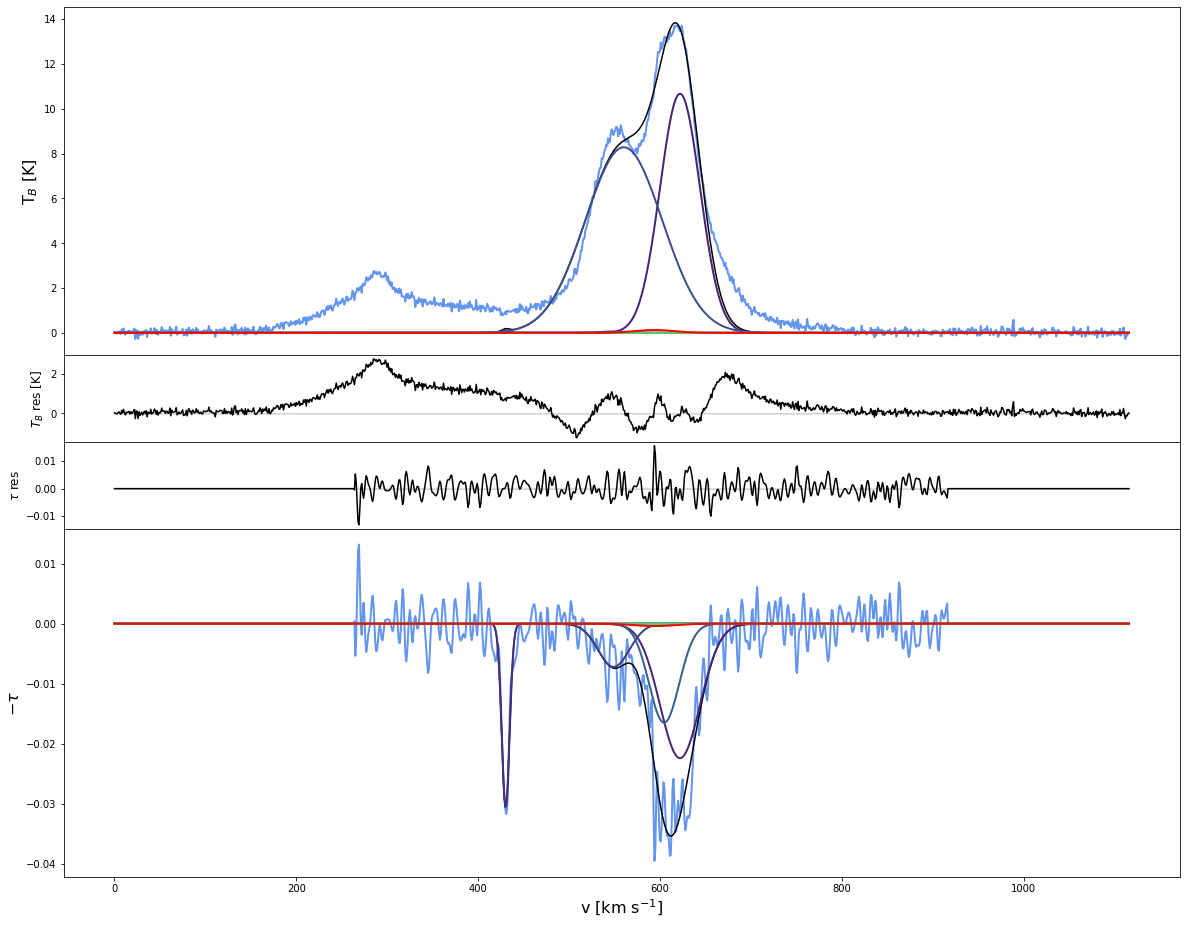

Gaussian 10 initialised as:
[[2.90818632e-01 5.94000000e+02 2.41897757e+01]
 [1.56028821e-02 5.94000000e+02 2.41897757e+01]]
Unpreferenced lambdas: 0.0001, 0.01
********************
Fitted parameters
[[4.82684636e+02 0.00000000e+00 0.00000000e+00 3.82033156e+00
  0.00000000e+00 0.00000000e+00 8.80634849e+00 5.47000000e+02
  1.43492016e+01 8.23138319e+00 5.60346769e+02 4.22998363e+01
  0.00000000e+00 5.93744143e+02 2.32553060e+01 0.00000000e+00
  5.94117035e+02 1.75459235e+01 0.00000000e+00 5.94053767e+02
  2.44845363e+01 0.00000000e+00 5.94016223e+02 2.10782958e+01
  6.21337759e-02 5.94001651e+02 2.20827966e+01 2.23179763e-01
  5.94000259e+02 2.41899184e+01]
 [2.23883148e-02 6.22349851e+02 2.16357670e+01 3.05411697e-02
  4.30399894e+02 4.31587781e+00 7.12236401e-03 5.49112429e+02
  1.70398060e+01 0.00000000e+00 5.41476440e+02 1.08651289e+01
  1.59968941e-02 6.04773050e+02 1.63124334e+01 6.84692920e-06
  5.93921495e+02 1.81583370e+01 0.00000000e+00 5.94092874e+02
  2.36322421e+01 6.6578

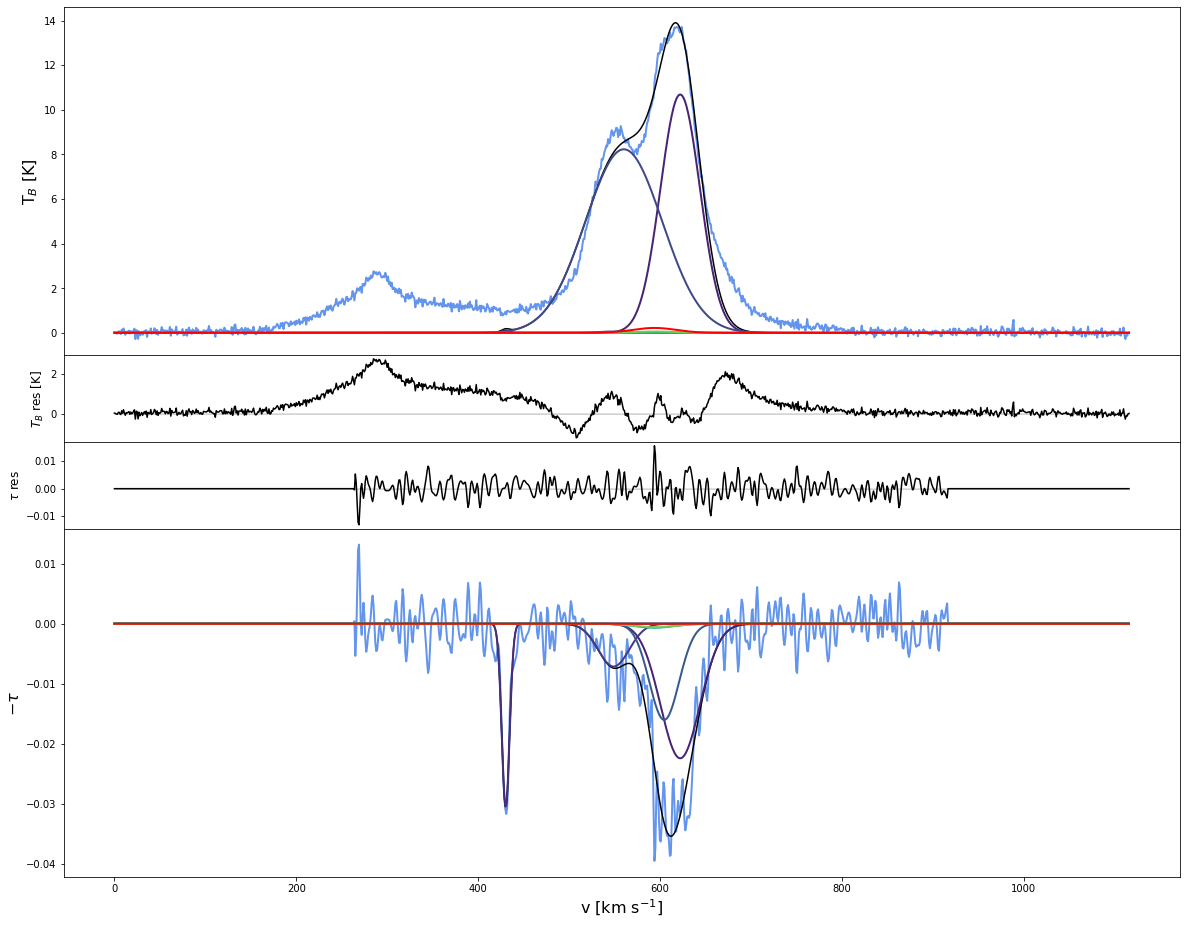

In [29]:
solution = iterative(np.array([Tb_sponge, tau_sponge]), 10, rms=np.array([rms_Tb,rms_tau]), init_tau_pref=5.)

<a id='func'></a>
## Functions

In [28]:
def plot_model(cube, model_cube, params, n_gauss, threshold, rms=None):
    approx=False
    pvalues = np.logspace(-1, 0, n_gauss)
    pmin = pvalues[0]
    pmax = pvalues[-1]
    
    if rms==None:
        rms=np.zeros(cube.shape)
    v=np.arange(cube.shape[1])
    fig, [ax1, ax2, ax3, ax4] = plt.subplots(4, 1, sharex=True, figsize=(20,16),gridspec_kw={'height_ratios': [4,1,1,4]})
    fig.subplots_adjust(hspace=0.)
    ax1.plot(v, cube[0,:], color='cornflowerblue', linewidth=2.)
    ax1.plot(v, model_cube[0,:], color='k')
    if params.shape[1]>3:
        for k in np.arange(n_gauss-1):
            if k>=threshold:
                approx=True
            line = make_model(cube, params[:,3*k:3*(k+1)], 1, threshold, approx=approx)[0,:]
            ax1.plot(v, line, color=plt.cm.viridis(pvalues[k]), linewidth=2.)
    final_idx=3*(n_gauss-1)
    if n_gauss>threshold:
        approx=True
    line = make_model(cube, params[:,3*(n_gauss-1):], 1, threshold, approx=approx)[0,:]
    ax1.plot(v, line, color='r', linewidth=2.)
    
    ax2.plot(v, -model_cube[0,:] + cube[0,:], color='k')
    ax2.fill_between(v, -3.*rms[0,:], 3.*rms[0,:], facecolor='lightgray', color='lightgray')
    ax3.plot(v, -model_cube[1,:] + cube[1,:], color='k')
    ax3.fill_between(v, -3.*rms[1,:], 3.*rms[1,:], facecolor='lightgray', color='lightgray')
    ax4.plot(v, -cube[1,:], color='cornflowerblue', linewidth=2.)
    ax4.plot(v, -model_cube[1,:], color='k')
    if params.shape[1]>3:
        for k in np.arange(n_gauss-1):
            line = make_model(cube, params[:,3*k:3*(k+1)], 1, threshold)[1,:]
            ax4.plot(v, -line, color=plt.cm.viridis(pvalues[k]), linewidth=2.)
    final_idx=4*(n_gauss-1)
    line = make_model(cube, params[:,3*(n_gauss-1):], 1, threshold)[1,:]
    ax4.plot(v, -line, color='r', linewidth=2.)
    
    ax1.set_ylabel(r'T$_{B}$ [K]', fontsize=16)
    ax2.set_ylabel(r'$T_B$ res [K]', fontsize=12)
    ax3.set_ylabel(r"$\tau$ res", fontsize=12)
    ax4.set_ylabel(r'$- \tau$', fontsize=16)
    ax4.set_xlabel(r'v [km s$^{-1}$]', fontsize=16)
    plt.show()
    return

In [15]:
def plot_data(Tb, tau, rms=None):
    if rms==None:
        rms=np.zeros((len(Tb),2))
    v=np.arange(len(Tb))
    fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(10,10),gridspec_kw={'height_ratios': [1,1]})
    fig.subplots_adjust(hspace=0.)
    ax1.plot(v, Tb, color='cornflowerblue', linewidth=2.)
    ax1.fill_between(v, Tb-3.*rms[:,0], Tb+3.*rms[:,0], facecolor='lightgray', color='lightgray')
    ax2.plot(v, -tau, color='cornflowerblue', linewidth=2.)
    ax2.fill_between(v, -tau-3.*rms[:,0], -tau+3.*rms[:,0], facecolor='lightgray', color='lightgray')
    return

In [16]:
def gaussian(x, amp, mu, sig):
        return amp * np.exp(-((x - mu)**2)/(2. * sig**2))

In [17]:
def make_model(data, pars, n_gauss, threshold, approx=False):
    params = np.reshape(pars, (2,3*n_gauss))
    x=np.arange(data.shape[1])
    model=np.zeros(data.shape)
    for i in np.arange(data.shape[0]):
        for k in np.arange(n_gauss):
            if i==0:
                if k>=threshold or approx==True:
                    model[i,:] += gaussian(x, params[0, 0+(k*3)], params[0, 1+(k*3)], params[0, 2+(k*3)])
                elif k<threshold:
                    model[i,:] += params[0, 0+(k*3)]*(np.ones(data.shape[1])-np.exp(-gaussian(x, params[1, 0+(k*3)], params[1, 1+(k*3)], params[1, 2+(k*3)])))
            elif i==1:
                model[i,:] += gaussian(x, params[1, 0+(k*3)], params[1, 1+(k*3)], params[1, 2+(k*3)])
    return model

In [18]:
def f_g(params, data, n_gauss, threshold, rms=None, l_tb=10., l_tau=10., guess=False):
    try:
        if rms==None:
            rms=np.ones(data.shape)
    except ValueError:
        rms=rms
    x=np.arange(data.shape[1])
    model=make_model(data, params, n_gauss, threshold)
    F=data-model
    F/=rms
    J=0.5*l_tb*np.sum(F[0,:]**2)+0.5*l_tau*np.sum(F[1,:]**2)
    if guess==True:
        return np.array([0.5*l_tb*np.sum(F[0,:]**2), 0.5*l_tau*np.sum(F[1,:]**2)])
    else:                                                         
        return J

In [19]:
def sig_guess(v, res, c, radius=10):
    mid_point_idx = np.where(v==c)[0][0]
    dv = np.abs(v[0]-v[1])
    v_dif = np.arange(v[mid_point_idx-radius],v[mid_point_idx+radius+1],dv)
    if mid_point_idx<radius:
        v_dif = np.arange(v[0],v[mid_point_idx+radius+1],dv)-v[mid_point_idx]
        R = res[:midpoint_idx+radius+1]
    elif mid_point_idx>(len(v)-(radius+2)):
        v_dif = np.arange(v[mid_point_idx-radius],v[-1],dv)-v[mid_point_idx]
        R = res[mid_point_idx-radius:]
    else:
        v_dif = np.arange(v[mid_point_idx-radius],v[mid_point_idx+radius+1],dv)-v[mid_point_idx]
        R = res[mid_point_idx-radius:mid_point_idx+radius+1]
    guess = np.sqrt(np.sum((v_dif**2)*np.abs(R/R[radius]))/len(R))
    #guess = np.sqrt(np.sum((v_dif**2)*np.abs(R))/len(R))
    return guess

In [20]:
def init_bounds(cube, params, lb_bamp=0., lb_amp=0., lb_mu=0., ub_mu=np.nan, 
                lb_sig=0., ub_sig=np.nan):
    if np.isnan(ub_mu):
        ub_mu = np.nanmax(cube.shape)
    if np.isnan(ub_sig):
        ub_sig = np.nanmax(cube.shape)
        
    bounds_inf = np.zeros(params.shape)
    bounds_sup = np.zeros(params.shape)
    
    bounds_B = [lb_bamp, np.inf]
    bounds_A = [lb_amp, np.nanmax(cube[1,:])]
    bounds_mu = [lb_mu, ub_mu]
    bounds_sig = [lb_sig, ub_sig]

    for i in np.arange(params.shape[0]):
        for k in np.arange(params.shape[1]/3):
            if i==0:
                bounds_inf[i,int(0+(3*k))] = bounds_B[0]
            else:
                bounds_inf[i,int(0+(3*k))] = bounds_A[0]
            bounds_inf[i,int(1+(3*k))] = bounds_mu[0]
            bounds_inf[i,int(2+(3*k))] = bounds_sig[0]
            
            if i==0:
                bounds_sup[i,int(0+(3*k))] = bounds_B[1]
            else:
                bounds_sup[i,int(0+(3*k))] = bounds_A[1]
            bounds_sup[i,int(1+(3*k))] = bounds_mu[1]
            bounds_sup[i,int(2+(3*k))] = bounds_sig[1]
            
    return [(bounds_inf.ravel()[i], bounds_sup.ravel()[i]) for i in np.arange(len(bounds_sup.ravel()))]

In [21]:
def iterative(data, n_gauss, rms=None, sig_init=2., init_tau_pref=2.):
    threshold=9999
    Tb_norm_factor = np.nanmax(data[1,:])/np.nanmax(data[0,:])
    l_ad = np.array([1.,1.])
    try:
        if rms==None:
            rms=np.ones(data.shape)
            l_ad= np.array([Tb_norm_factor**2, 1.])
    except ValueError:
        rms=rms
    x=np.arange(data.shape[1])
    #for first one we'll take it from the absorption because that is what we're doing for this one
    idx_1=np.argmax(data[1,:])
    Ts_1=data[0,idx_1]
    a_1=data[1,idx_1]
    mu_1=x[idx_1]
    sig_1=sig_guess(x, data[1,:], mu_1)
    params=np.array([[Ts_1,0., 0.],[a_1,mu_1,sig_1]])
    inital_log_magnitudes = np.log10(f_g(params, data, 1, threshold, rms=rms, l_tb=1., l_tau=1., guess=True))//1
    print('The initial log magnitudes of each component are:')
    print(inital_log_magnitudes)
    l_ad*=10**(1-inital_log_magnitudes)
    print('The adjusted magnitudes are:')
    print(l_ad)
    bounds = init_bounds(data, params)
    result=optimize.fmin_l_bfgs_b(f_g, params.ravel(), args=(data, 1, threshold, rms, l_ad[0], l_ad[1]*init_tau_pref), 
                                  bounds=bounds, approx_grad=True, maxiter=1500)
    params=np.reshape(result[0], (2,3))
    plot_model(data, make_model(data, params, 1, threshold), params, 1, threshold)
    
    for i in np.arange(2,n_gauss+1):
        res=data-make_model(data, params, i-1, threshold)
        if i<=threshold:
            idx_next=np.argmax(res[1,:])
        else:
            comp_res = np.array([res[0,:]*Tb_norm_factor,res[1,:]])
            idx_next=np.unravel_index(np.argmax(comp_res, axis=None), comp_res.shape)[1]
        xx=np.zeros((2,3*i))
        xx[:,:3*(i-1)]=params
        xx[1,3*(i-1)]=np.abs(res[1,idx_next])
        xx[0,3*(i-1)]=np.abs(res[0,idx_next])/(1-np.exp(-xx[1,3*(i-1)]))
        xx[1,(3*(i-1))+1]=x[idx_next]
        xx[1,(3*(i-1))+2]=sig_guess(x, res[1,:], x[idx_next], radius=40)
        if i>threshold:
            xx[0,3*(i-1)]=np.abs(res[0,idx_next])
            xx[0,(3*(i-1))+1]=x[idx_next]
            xx[0,(3*(i-1))+2]=sig_guess(x, res[0,:], x[idx_next], radius=40)
            xx[1,(3*(i-1))+2]=xx[0,(3*(i-1))+2]
        params=xx
        print('Gaussian {} initialised as:'.format(i))
        print(params[:,3*(i-1):])
        bounds = init_bounds(data, params)
        if i>threshold:
            print('Unpreferenced lambdas: {}, {}'.format(l_ad[0], l_ad[1]))
            result=optimize.fmin_l_bfgs_b(f_g, params.ravel(), args=(data, i, threshold, rms, l_ad[0], l_ad[1]),
                                          bounds=bounds, approx_grad=True, maxiter=1500)
        else:
            print('Preferenced lambdas: {}, {}'.format(l_ad[0], l_ad[1]*init_tau_pref))
            result=optimize.fmin_l_bfgs_b(f_g, params.ravel(), args=(data, i, threshold, rms, l_ad[0], l_ad[1]*init_tau_pref), 
                                      bounds=bounds, approx_grad=True, maxiter=1500)
        last_fit_tau_amp = np.reshape(result[0], (2,3*i))[1,-3]
        if last_fit_tau_amp<1e-9 and threshold==9999:
            threshold=i
            print('Threshold reached at {}'.format(i))
            idx_next=np.argmax(res[0,:])
            xx[0,3*(i-1)]=np.abs(res[0,idx_next])
            xx[0,(3*(i-1))+1]=x[idx_next]
            xx[0,(3*(i-1))+2]=sig_guess(x, res[0,:], x[idx_next], radius=40)
            xx[1,3*(i-1)]=np.abs(res[1,idx_next])
            xx[1,(3*(i-1))+1]=x[idx_next]
            xx[1,(3*(i-1))+2]=xx[0,(3*(i-1))+2]
            bounds = init_bounds(data, params)
            result=optimize.fmin_l_bfgs_b(f_g, params.ravel(), args=(data, i, threshold, rms, l_ad[0], l_ad[1]), bounds=bounds,
                                      approx_grad=True, maxiter=1500)
        params=np.reshape(result[0], (2,3*i))
        print('********************')
        print('Fitted parameters')
        print(params)
        print('********************')
        plot_model(data, make_model(data, result[0], i, threshold), params, i,threshold)
    return params
    

In [22]:
def plot_synth_comp(x, y, n_gauss):
    fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(2, 2, figsize=(22,16), sharey='row')
    a = fig.subplots_adjust(wspace=0.)
    v_synth = np.arange(-40.,40.2,0.2)
    Tb_params= solution_map['pix_{}_{}'.format(x,y)][0,:]
    try:
        threshold = (np.where(Tb_params[1::3]>0.)[0][0]) + 1
        print('The regime change occurs at n={}'.format(threshold))
    except ValueError:
        threshold=9999
        print('The regime change was not reached')
    print(solution_map['pix_{}_{}'.format(x,y)])
    full_model = make_model(np.array([cube[:,y-1,x-1],tau[:,y-1,x-1]]), solution_map['pix_{}_{}'.format(x,y)], n_gauss, threshold)
    colour = ['firebrick','gold','limegreen','aqua','navy','mediumorchid']

    ax1.plot(v_synth,cube[:,y-1,x-1], 'k', label='Data')
    ax1.plot(v_synth,cube_CNM[:,y-1,x-1], 'b--', label='CNM')
    ax1.plot(v_synth,cube_LNM[:,y-1,x-1], 'g--', label='UNM')
    ax1.plot(v_synth,cube_WNM[:,y-1,x-1], 'r--', label='WNM')

    ax2.plot(v_synth,cube[:,y-1,x-1], 'k', label='Data')
    ax2.plot(v_synth,full_model[0,:], color='magenta', linestyle='dashed', label='Model')

    ax3.plot(v_synth,tau[:,y-1,x-1], 'k', label='Data')
    ax3.plot(v_synth,tau_CNM[:,y-1,x-1], 'b--', label='CNM')
    ax3.plot(v_synth,tau_LNM[:,y-1,x-1], 'g--', label='UNM')
    ax3.plot(v_synth,tau_WNM[:,y-1,x-1], 'r--', label='WNM')

    ax4.plot(v_synth,tau[:,y-1,x-1], 'k', label='Data')
    ax4.plot(v_synth,full_model[1,:], color='magenta', linestyle='dashed')

    for i in np.arange(n_gauss):
        if i<threshold-1:
            line = make_model(np.array([cube[:,y-1,x-1],tau[:,y-1,x-1]]), solution_map['pix_{}_{}'.format(x,y)][:,3*i:3*(i+1)], 1, threshold)
        else:
            line = make_model(np.array([cube[:,y-1,x-1],tau[:,y-1,x-1]]), solution_map['pix_{}_{}'.format(x,y)][:,3*i:3*(i+1)], 1, threshold, approx=True)
        ax2.plot(v_synth, line[0,:], color=colour[i], linestyle='dashed', label='Component {}'.format(i+1))
        ax4.plot(v_synth, line[1,:], color=colour[i], linestyle='dashed', label='Component {}'.format(i+1))
        
    ax1.set_ylabel("Brightness temperature (K)")
    ax1.set_xlabel("Velocity (km/s)")
    ax2.set_xlabel("Velocity (km/s)")
    ax3.set_ylabel("Opacity")
    ax3.set_xlabel("Velocity (km/s)")
    ax4.set_xlabel("Velocity (km/s)")
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    
    plt.show()

In [ ]:
solution_map['pix_1_1']

In [ ]:
make_model(np.array([cube[:,0,0],tau[:,0,0]]), solution_map['pix_1_1'][:,9:12], 1, threshold, approx=True)